In [220]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers

import gensim
from gensim.utils import simple_preprocess
from scipy.spatial.distance import cosine as cosine_distance

In [2]:
df = pd.read_csv('YCombinatorStartups.csv', index_col=0)

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df.head()

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,tags_highlighted,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID
0,325,Dropbox,dropbox,[],https://bookface-images.s3.amazonaws.com/small...,http://dropbox.com,"San Francisco, CA, USA",Dropbox is building the world’s first smart wo...,Backup and share files in the cloud.,4000.0,False,False,False,B2B,B2B -> Productivity,1326791328,[],[],True,True,False,False,S07,Public,"['B2B', 'Productivity']","['United States of America', 'America / Canada']",Growth,False,False,NaN,False,325
1,379,Reddit,reddit,[],https://bookface-images.s3.amazonaws.com/small...,http://reddit.com,"San Francisco, CA, USA",Founded by Steve Huffman and Alexis Ohanian in...,The frontpage of the internet.,201.0,False,False,False,Consumer,Consumer -> Content,1326791708,"['Community', 'Social Media', 'Social', 'Socia...",[],True,True,False,False,S05,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Early,False,False,NaN,False,379
2,383,Twitch,twitch,"['Justin.tv', 'Twitch']",https://bookface-images.s3.amazonaws.com/small...,http://twitch.com,"San Francisco, CA, USA",Twitch is the world’s leading video platform a...,A global community creating the future of live...,2000.0,True,False,False,Consumer,Consumer -> Content,1326791723,"['Community', 'Gaming', 'Social Media', 'Video...",[],True,False,False,False,W07,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada...",Growth,False,False,NaN,False,383
3,356,Scribd,scribd,[],https://bookface-images.s3.amazonaws.com/small...,http://scribd.com,"San Francisco, CA, USA",Read and listen without limits. Unlimited* aud...,World's largest online library.,300.0,False,False,False,Consumer,Consumer -> Content,1326791580,[],[],True,True,True,False,S06,Active,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Growth,False,False,NaN,False,356
4,344,Weebly,weebly,[],https://bookface-images.s3.amazonaws.com/small...,http://weebly.com,"San Francisco, CA, USA",Company Information\r\nWeebly is a consumer se...,Build a free website that grows with your busi...,201.0,False,False,False,B2B,B2B -> Marketing,1326791493,[],[],True,False,False,False,W07,Acquired,"['B2B', 'Marketing']","['United States of America', 'America / Canada']",Growth,False,False,NaN,False,344


In [235]:
df[df['status']=='Inactive'][df['stage'] == 'Growth'].sort_values(by='team_size', ascending=False)

/var/folders/7x/y3pstmxx73nglmqj36qhzblh0000gn/T/ipykernel_40832/2307904890.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['status']=='Inactive'][df['stage'] == 'Growth'].sort_values(by='team_size', ascending=False)


,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region,Unspecified - region,num_locations,num_regions,industries_lists,tags_lists,industries_and_tags,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Engineering,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Product and Design,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early,Growth,success,active
801,le-tote,[],https://bookface-images.s3.amazonaws.com/small...,http://letote.com,"San Francisco, CA, USA","Le Tote is the leading online fashion service,...",Subscription service for women's apparel & acc...,201.0,False,False,False,Consumer,Consumer -> Apparel and Cosmetics,1367523571,['Fashion'],False,False,False,False,S13,Inactive,"['Consumer', 'Apparel and Cosmetics']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[Consumer, Apparel and Cosmetics]",[Fashion],"[Fashion, Apparel and Cosmetics, Consumer]",3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,False,True,0,0
854,lendup,[],https://bookface-images.s3.amazonaws.com/small...,http://lendup.com,"San Francisco, CA, USA",Could a fintech company be built that helps pe...,LendUp is a socially responsible company on a ...,201.0,False,False,False,Fintech,Fintech -> Credit and Lending,1322045860,"['Fintech', 'Lending']",False,False,False,False,W12,Inactive,"['Fintech', 'Credit and Lending']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[Fintech, Credit and Lending]","[Fintech, Lending]","[Lending, Fintech, Credit and Lending]",3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,False,True,0,0
1640,atrium,[],https://bookface-images.s3.amazonaws.com/small...,http://www.atrium.co,"San Francisco, CA, USA",Atrium is a new kind of law firm. We serve the...,Modern law firm for startups powered by propri...,180.0,False,False,False,B2B,B2B -> Legal,1510300998,['LegalTech'],False,False,False,False,W18,Inactive,"['B2B', 'Legal']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[B2B, Legal]",[LegalTech],"[Legal, B2B, LegalTech]",3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4410 non-null   int64  
 1   name                    4410 non-null   object 
 2   slug                    4410 non-null   object 
 3   former_names            4410 non-null   object 
 4   small_logo_thumb_url    4410 non-null   object 
 5   website                 4388 non-null   object 
 6   all_locations           4253 non-null   object 
 7   long_description        4072 non-null   object 
 8   one_liner               4216 non-null   object 
 9   team_size               4344 non-null   float64
 10  highlight_black         4410 non-null   bool   
 11  highlight_latinx        4410 non-null   bool   
 12  highlight_women         4410 non-null   bool   
 13  industry                4410 non-null   object 
 14  subindustry             4410 non-null   objec

In [6]:
for col in df.columns:
    if df[col].dtype != 'O':
        print(col, 'sum:', df[col].sum(), '\t\taverage:', df[col].mean())

id sum: 61628171 		average: 13974.641950113379
team_size sum: 231161.0 		average: 53.213858195211785
highlight_black sum: 246 		average: 0.055782312925170066
highlight_latinx sum: 452 		average: 0.10249433106575964
highlight_women sum: 642 		average: 0.145578231292517
launched_at sum: 6820780942422 		average: 1546662345.2204082
top_company sum: 340 		average: 0.07709750566893424
top_company_by_revenue sum: 48 		average: 0.010884353741496598
isHiring sum: 947 		average: 0.2147392290249433
nonprofit sum: 43 		average: 0.009750566893424037
app_video_public sum: 51 		average: 0.011564625850340135
demo_day_video_public sum: 111 		average: 0.025170068027210883
question_answers sum: 62 		average: 0.014058956916099773
objectID sum: 61628171 		average: 13974.641950113379


In [7]:
for col in df.columns:
    if df[col].dtype == 'O':
        print(df[col].value_counts(), '\n')

name
Index             3
Apollo            3
Atlas             3
Haven             3
Feather           3
                 ..
Reebeez           1
ApolloShield      1
Yoshi Mobility    1
OMG Digital       1
Stellar           1
Name: count, Length: 4358, dtype: int64 

slug
dropbox                      1
dealls-jobs-and-mentoring    1
nara                         1
powerhouse-ai                1
circular                     1
                            ..
ready-education              1
smartpath                    1
curtsy                       1
airfordable                  1
stellar                      1
Name: count, Length: 4410, dtype: int64 

former_names
[]                                             2549
['Spot']                                          2
['Stack']                                         2
['Kyte']                                          2
['Zelos']                                         2
                                               ... 
['Root Software']   

In [8]:
df.isna().sum()

id                           0
name                         0
slug                         0
former_names                 0
small_logo_thumb_url         0
website                     22
all_locations              157
long_description           338
one_liner                  194
team_size                   66
highlight_black              0
highlight_latinx             0
highlight_women              0
industry                     0
subindustry                  0
launched_at                  0
tags                         0
tags_highlighted             0
top_company                  0
top_company_by_revenue       0
isHiring                     0
nonprofit                    0
batch                        0
status                       0
industries                   0
regions                      0
stage                        0
app_video_public             0
demo_day_video_public        0
app_answers               4298
question_answers             0
objectID                     0
dtype: i

I want to get rid of unneccessary columns or columns overly specific to Y Combinator. I'll drop the name column instead of slug because all the slugs were unique, but I'll probably drop the slugs later on too before modelling. I will create a column of the number of former names instead of the current list of former names. Logo, website, and one liner I'll make into binary columns of has it or not. For nulls in team size column, I will probably set these values to the mean of the column. Locations/regions and industry/subindustry/tags I'll need to do more complicated one-hot-encoding on. Descriptions I need to do word embeddings for. I'll use launched at and batch to get years since founding, but this may be a measure of success instead of a feature to train the model on. Top company and top company by revenue I'll either use as measures for success or drop. Status and stage will be dummied; either or both of these will also be measure of success. 

In [9]:
df.drop(columns=['id', 'name', 'tags_highlighted', 'app_video_public', 'demo_day_video_public', 'app_answers', 'question_answers', 'objectID'], inplace=True)

In [10]:
# creating a new column for number of former names
df['num_former_names'] = df['former_names'].apply(lambda row: 0 if len(row) == 2 else len(row.replace('[', '').replace(']', '').replace("'", "").replace(' ', '').split(',')))

In [11]:
# creating new column for has logo or not
df['has_logo'] = np.where(df['small_logo_thumb_url'] == '/company/thumb/missing.png', False, True)

In [12]:
# creating new column for has website or not
df['has_website'] = np.where(df['website'].isna() | df['website'] == 'http://', False, True)

In [13]:
# creating new column for has one liner or not
df['has_one_liner'] = np.where(df['one_liner'].isna(), False, True)

In [14]:
# check to see that this all worked
df.head()

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner
0,dropbox,[],https://bookface-images.s3.amazonaws.com/small...,http://dropbox.com,"San Francisco, CA, USA",Dropbox is building the world’s first smart wo...,Backup and share files in the cloud.,4000.0,False,False,False,B2B,B2B -> Productivity,1326791328,[],True,True,False,False,S07,Public,"['B2B', 'Productivity']","['United States of America', 'America / Canada']",Growth,0,True,True,True
1,reddit,[],https://bookface-images.s3.amazonaws.com/small...,http://reddit.com,"San Francisco, CA, USA",Founded by Steve Huffman and Alexis Ohanian in...,The frontpage of the internet.,201.0,False,False,False,Consumer,Consumer -> Content,1326791708,"['Community', 'Social Media', 'Social', 'Socia...",True,True,False,False,S05,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Early,0,True,True,True
2,twitch,"['Justin.tv', 'Twitch']",https://bookface-images.s3.amazonaws.com/small...,http://twitch.com,"San Francisco, CA, USA",Twitch is the world’s leading video platform a...,A global community creating the future of live...,2000.0,True,False,False,Consumer,Consumer -> Content,1326791723,"['Community', 'Gaming', 'Social Media', 'Video...",True,False,False,False,W07,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada...",Growth,2,True,True,True
3,scribd,[],https://bookface-images.s3.amazonaws.com/small...,http://scribd.com,"San Francisco, CA, USA",Read and listen without limits. Unlimited* aud...,World's largest online library.,300.0,False,False,False,Consumer,Consumer -> Content,1326791580,[],True,True,True,False,S06,Active,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Growth,0,True,True,True
4,weebly,[],https://bookface-images.s3.amazonaws.com/small...,http://weebly.com,"San Francisco, CA, USA",Company Information\r\nWeebly is a consumer se...,Build a free website that grows with your busi...,201.0,False,False,False,B2B,B2B -> Marketing,1326791493,[],True,False,False,False,W07,Acquired,"['B2B', 'Marketing']","['United States of America', 'America / Canada']",Growth,0,True,True,True


In [15]:
# 2549 should have 0 former names
df['num_former_names'].value_counts()

num_former_names
0     2549
1     1065
2      439
3      203
4       82
5       42
6       10
7       10
8        5
14       2
10       2
11       1
Name: count, dtype: int64

In [16]:
# 714 should not have a logo, 27 should not have a website, 194 should not have a one liner
df[['has_logo', 'has_website', 'has_one_liner']].sum() - 4410

has_logo        -714
has_website        0
has_one_liner   -194
dtype: int64

In [17]:
# website didn't work, what happened?
df['website'].isna().sum() 

22

In [18]:
(df['website'] == 'http://').sum()

5

In [19]:
(df['website'].isna() | (df['website'] == 'http://')).sum()

27

In [20]:
# try putting parantheses around each clause
df['has_website'] = np.where((df['website'].isna()) | (df['website'] == 'http://'), False, True)

In [21]:
# check again
df['has_website'].sum() - 4410

-27

In [22]:
# set nulls in team size to the mean of the column
for i in range(len(df['team_size'])):
    if np.isnan(df['team_size'][i]):
        df.at[i, 'team_size'] = 53.2

In [23]:
df.isna().sum()

slug                        0
former_names                0
small_logo_thumb_url        0
website                    22
all_locations             157
long_description          338
one_liner                 194
team_size                   0
highlight_black             0
highlight_latinx            0
highlight_women             0
industry                    0
subindustry                 0
launched_at                 0
tags                        0
top_company                 0
top_company_by_revenue      0
isHiring                    0
nonprofit                   0
batch                       0
status                      0
industries                  0
regions                     0
stage                       0
num_former_names            0
has_logo                    0
has_website                 0
has_one_liner               0
dtype: int64

Now I want to figure out how to deal with the location columns. Do I want information from both all_locations and regions?

In [24]:
df['all_locations']

0                                  San Francisco, CA, USA
1                                  San Francisco, CA, USA
2                                  San Francisco, CA, USA
3                                  San Francisco, CA, USA
4                                  San Francisco, CA, USA
                              ...                        
4405                                               Remote
4406    San Francisco, CA, USA; Sunnyvale, CA, USA; Re...
4407                       San Francisco, CA, USA; Remote
4408    College Park, MD, USA; Rockville, MD, USA; Remote
4409                               San Francisco, CA, USA
Name: all_locations, Length: 4410, dtype: object

In [25]:
df['regions']

0        ['United States of America', 'America / Canada']
1        ['United States of America', 'America / Canada']
2       ['United States of America', 'America / Canada...
3        ['United States of America', 'America / Canada']
4        ['United States of America', 'America / Canada']
                              ...                        
4405                           ['Remote', 'Fully Remote']
4406    ['United States of America', 'America / Canada...
4407    ['United States of America', 'America / Canada...
4408    ['United States of America', 'America / Canada...
4409    ['United States of America', 'America / Canada...
Name: regions, Length: 4410, dtype: object

all_locations has cities, states, and countries; regions has only countries. Ideally I'd like to get the cities out of all_locations and the countries out of regions. I'll get the cities first.

In [26]:
df['all_locations'][0].split(';')

['San Francisco, CA, USA']

In [27]:
type(df['all_locations'][0].split(';'))

list

In [28]:
df['location_lists'] = df['all_locations'].apply(lambda row: row.split(';') if type(row)==str else [])

In [29]:
df.tail()

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists
4405,emerge-career,"['Ameelio', 'Ameelio Emerge', 'Emerge']",https://bookface-images.s3.amazonaws.com/small...,https://www.emergecareer.com/,Remote,Emerge sells online job training to the govern...,Selling online job training to the government,3.0,True,True,False,Education,Education,1657112954,"['Education', 'GovTech']",False,False,False,False,S22,Active,['Education'],"['Remote', 'Fully Remote']",Early,3,True,True,True,[Remote]
4406,opensight,['FastFile'],https://bookface-images.s3.amazonaws.com/small...,https://www.opensight.ai,"San Francisco, CA, USA; Sunnyvale, CA, USA; Re...",OpenSight helps companies quickly scale up the...,AI-powered customer support automation for fas...,3.0,False,False,True,B2B,B2B -> Operations,1673668209,"['Generative AI', 'B2B', 'Customer Success', '...",False,False,False,False,W23,Inactive,"['B2B', 'Operations']","['United States of America', 'America / Canada...",Early,1,True,True,True,"[San Francisco, CA, USA, Sunnyvale, CA, USA, ..."
4407,mogara,[],https://bookface-images.s3.amazonaws.com/small...,https://mogara.com,"San Francisco, CA, USA; Remote",Mogara automates software R&D capitalization.\...,Automatic software R&D capitalization,2.0,False,False,True,B2B,B2B -> Finance and Accounting,1674525873,"['Finance', 'B2B']",False,False,False,False,W23,Inactive,"['B2B', 'Finance and Accounting']","['United States of America', 'America / Canada...",Early,0,True,True,True,"[San Francisco, CA, USA, Remote]"
4408,manatee,"['Quandry', 'PreStacks']",https://bookface-images.s3.amazonaws.com/small...,https://www.trymanatee.com/?utm_source=bookface,"College Park, MD, USA; Rockville, MD, USA; Remote",We let you see everything about how prospects ...,DocSend for demos.,2.0,False,False,False,B2B,B2B -> Sales,1657678584,"['B2B', 'Sales']",False,False,False,False,S22,Inactive,"['B2B', 'Sales']","['United States of America', 'America / Canada...",Early,2,True,True,True,"[College Park, MD, USA, Rockville, MD, USA, ..."
4409,stellar,[],https://bookface-images.s3.amazonaws.com/small...,http://www.stellarapp.io,"San Francisco, CA, USA",A fool-proof goals platform using GPT to help ...,AI-powered business goals,3.0,False,False,True,B2B,B2B,1662916743,"['SaaS', 'B2B', 'Productivity', 'Analytics']",False,False,False,False,S22,Inactive,['B2B'],"['United States of America', 'America / Canada...",Early,0,True,True,True,"[San Francisco, CA, USA]"


In [30]:
df.explode('location_lists')['location_lists'].value_counts()

location_lists
San Francisco, CA, USA             1352
 Remote                            1110
New York, NY, USA                   407
 San Francisco, CA, USA             174
London, England, United Kingdom     117
                                   ... 
 Fort Worth, TX, USA                  1
Algeria                               1
 Charleston, SC, USA                  1
Kiel, SH, Germany                     1
 Rockville, MD, USA                   1
Name: count, Length: 621, dtype: int64

In [31]:
# exploding on location_lists yields 621 unique locations but there are leading whitespaces in a lot of them. How many locations are there really?
locations = []

for loc_list in df['location_lists']:
    for loc in loc_list:
        locations.append(loc.lstrip())
        
len(set(locations))

475

In [32]:
# looks like I need to remove these whitespaces
df['location_lists'] = df['location_lists'].apply(lambda row: [x.lstrip() for x in row]) 

In [33]:
df['location_lists'][4406]

['San Francisco, CA, USA', 'Sunnyvale, CA, USA', 'Remote']

In [34]:
# check
df.explode('location_lists')['location_lists'].value_counts()

location_lists
San Francisco, CA, USA             1526
Remote                             1155
New York, NY, USA                   480
London, England, United Kingdom     164
Bengaluru, KA, India                136
                                   ... 
Des Moines, IA, USA                   1
SC, Brazil                            1
Hanoi, Vietnam                        1
Aarhus, Denmark                       1
Rockville, MD, USA                    1
Name: count, Length: 475, dtype: int64

In [35]:
# that worked, now how many cities do I want to dummy?
df.explode('location_lists')['location_lists'].value_counts(normalize=True)[:10].sum()

0.6305661577608141

In [36]:
# the top 10 cities account for 63% of all mentioned cities, how many are there that are mentioned at least 1% of the time
(df.explode('location_lists')['location_lists'].value_counts(normalize=True) >= .01).sum()

14

In [37]:
df.explode('location_lists')['location_lists'].value_counts(normalize=True)[:14]

location_lists
San Francisco, CA, USA             0.242684
Remote                             0.183683
New York, NY, USA                  0.076336
London, England, United Kingdom    0.026081
Bengaluru, KA, India               0.021628
Los Angeles, CA, USA               0.021310
Palo Alto, CA, USA                 0.017653
Mountain View, CA, USA             0.014631
Toronto, ON, Canada                0.014472
Boston, MA, USA                    0.012087
Seattle, WA, USA                   0.011609
Mexico City, CDMX, Mexico          0.011609
Paris, Île-de-France, France       0.010814
Austin, TX, USA                    0.010496
Name: proportion, dtype: float64

I will make columns for these 14 cities and another for other cities, so 15 total city columns.

In [38]:
# first get list of these cities
list(df.explode('location_lists')['location_lists'].value_counts()[:14].index)

['San Francisco, CA, USA',
 'Remote',
 'New York, NY, USA',
 'London, England, United Kingdom',
 'Bengaluru, KA, India',
 'Los Angeles, CA, USA',
 'Palo Alto, CA, USA',
 'Mountain View, CA, USA',
 'Toronto, ON, Canada',
 'Boston, MA, USA',
 'Seattle, WA, USA',
 'Mexico City, CDMX, Mexico',
 'Paris, Île-de-France, France',
 'Austin, TX, USA']

In [39]:
# creating the dummy columns and populating them based on the location_lists column 
top_cities = list(df.explode('location_lists')['location_lists'].value_counts()[:14].index)
top_cities.sort()
for city in top_cities:
    df[city] = df.apply(lambda row: 1 if city in row['location_lists'] else 0, axis=1)

In [40]:
# the other_city column gets populated for any row that does not already have a top city column checked off
df['other_city'] = df.apply(lambda row: 1 if len(np.setdiff1d(row['location_lists'], top_cities)) == len(row['location_lists']) else 0, axis=1)

In [41]:
df.tail()

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city
4405,emerge-career,"['Ameelio', 'Ameelio Emerge', 'Emerge']",https://bookface-images.s3.amazonaws.com/small...,https://www.emergecareer.com/,Remote,Emerge sells online job training to the govern...,Selling online job training to the government,3.0,True,True,False,Education,Education,1657112954,"['Education', 'GovTech']",False,False,False,False,S22,Active,['Education'],"['Remote', 'Fully Remote']",Early,3,True,True,True,[Remote],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4406,opensight,['FastFile'],https://bookface-images.s3.amazonaws.com/small...,https://www.opensight.ai,"San Francisco, CA, USA; Sunnyvale, CA, USA; Re...",OpenSight helps companies quickly scale up the...,AI-powered customer support automation for fas...,3.0,False,False,True,B2B,B2B -> Operations,1673668209,"['Generative AI', 'B2B', 'Customer Success', '...",False,False,False,False,W23,Inactive,"['B2B', 'Operations']","['United States of America', 'America / Canada...",Early,1,True,True,True,"[San Francisco, CA, USA, Sunnyvale, CA, USA, R...",0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4407,mogara,[],https://bookface-images.s3.amazonaws.com/small...,https://mogara.com,"San Francisco, CA, USA; Remote",Mogara automates software R&D capitalization.\...,Automatic software R&D capitalization,2.0,False,False,True,B2B,B2B -> Finance and Accounting,1674525873,"['Finance', 'B2B']",False,False,False,False,W23,Inactive,"['B2B', 'Finance and Accounting']","['United States of America', 'America / Canada...",Early,0,True,True,True,"[San Francisco, CA, USA, Remote]",0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4408,manatee,"['Quandry', 'PreStacks']",https://bookface-images.s3.amazonaws.com/small...,https://www.trymanatee.com/?utm_source=bookface,"College Park, MD, USA; Rockville, MD, USA; Remote",We let you see everything about how prospects ...,DocSend for demos.,2.0,False,False,False,B2B,B2B -> Sales,1657678584,"['B2B', 'Sales']",False,False,False,False,S22,Inactive,"['B2B', 'Sales']","['United States of America', 'America / Canada...",Early,2,True,True,True,"[College Park, MD, USA, Rockville, MD, USA, Re...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4409,stellar,[],https://bookface-images.s3.amazonaws.com/small...,http://www.stellarapp.io,"San Francisco, CA, USA",A fool-proof goals platform using GPT to help ...,AI-powered business goals,3.0,False,False,True,B2B,B2B,1662916743,"['SaaS', 'B2B', 'Productivity', 'Analytics']",False,False,False,False,S22,Inactive,['B2B'],"['United States of America', 'America / Canada...",Early,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
# the other column didn't populate correctly, what happened?
np.setdiff1d(df['location_lists'][4408], top_cities)

array(['College Park, MD, USA', 'Rockville, MD, USA'], dtype='<U21')

In [43]:
len(np.setdiff1d(df['location_lists'][4408], top_cities))

2

In [44]:
df['location_lists'][4408]

['College Park, MD, USA', 'Rockville, MD, USA', 'Remote']

In [45]:
len(df['location_lists'][4408])

3

In [46]:
# the logic above wasn't correct, try this instead
df['other_city'] = df.apply(lambda row: 1 if len(np.setdiff1d(row['location_lists'], top_cities)) > 0 else 0, axis=1)

In [47]:
df.tail()

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city
4405,emerge-career,"['Ameelio', 'Ameelio Emerge', 'Emerge']",https://bookface-images.s3.amazonaws.com/small...,https://www.emergecareer.com/,Remote,Emerge sells online job training to the govern...,Selling online job training to the government,3.0,True,True,False,Education,Education,1657112954,"['Education', 'GovTech']",False,False,False,False,S22,Active,['Education'],"['Remote', 'Fully Remote']",Early,3,True,True,True,[Remote],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4406,opensight,['FastFile'],https://bookface-images.s3.amazonaws.com/small...,https://www.opensight.ai,"San Francisco, CA, USA; Sunnyvale, CA, USA; Re...",OpenSight helps companies quickly scale up the...,AI-powered customer support automation for fas...,3.0,False,False,True,B2B,B2B -> Operations,1673668209,"['Generative AI', 'B2B', 'Customer Success', '...",False,False,False,False,W23,Inactive,"['B2B', 'Operations']","['United States of America', 'America / Canada...",Early,1,True,True,True,"[San Francisco, CA, USA, Sunnyvale, CA, USA, R...",0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4407,mogara,[],https://bookface-images.s3.amazonaws.com/small...,https://mogara.com,"San Francisco, CA, USA; Remote",Mogara automates software R&D capitalization.\...,Automatic software R&D capitalization,2.0,False,False,True,B2B,B2B -> Finance and Accounting,1674525873,"['Finance', 'B2B']",False,False,False,False,W23,Inactive,"['B2B', 'Finance and Accounting']","['United States of America', 'America / Canada...",Early,0,True,True,True,"[San Francisco, CA, USA, Remote]",0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4408,manatee,"['Quandry', 'PreStacks']",https://bookface-images.s3.amazonaws.com/small...,https://www.trymanatee.com/?utm_source=bookface,"College Park, MD, USA; Rockville, MD, USA; Remote",We let you see everything about how prospects ...,DocSend for demos.,2.0,False,False,False,B2B,B2B -> Sales,1657678584,"['B2B', 'Sales']",False,False,False,False,S22,Inactive,"['B2B', 'Sales']","['United States of America', 'America / Canada...",Early,2,True,True,True,"[College Park, MD, USA, Rockville, MD, USA, Re...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4409,stellar,[],https://bookface-images.s3.amazonaws.com/small...,http://www.stellarapp.io,"San Francisco, CA, USA",A fool-proof goals platform using GPT to help ...,AI-powered business goals,3.0,False,False,True,B2B,B2B,1662916743,"['SaaS', 'B2B', 'Productivity', 'Analytics']",False,False,False,False,S22,Inactive,['B2B'],"['United States of America', 'America / Canada...",Early,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Now do the same for the regions column.

In [48]:
df['regions']

0        ['United States of America', 'America / Canada']
1        ['United States of America', 'America / Canada']
2       ['United States of America', 'America / Canada...
3        ['United States of America', 'America / Canada']
4        ['United States of America', 'America / Canada']
                              ...                        
4405                           ['Remote', 'Fully Remote']
4406    ['United States of America', 'America / Canada...
4407    ['United States of America', 'America / Canada...
4408    ['United States of America', 'America / Canada...
4409    ['United States of America', 'America / Canada...
Name: regions, Length: 4410, dtype: object

In [49]:
df['regions'][0].replace('[', '').replace(']', '').replace("'", "").split(',')

['United States of America', ' America / Canada']

In [50]:
type(df['regions'][0].replace('[', '').replace(']', '').replace("'", "").split(','))

list

In [51]:
df['region_lists'] = df['regions'].apply(lambda row: row.replace('[', '').replace(']', '').replace("'", "").split(',') if type(row)==str else [])

In [52]:
df.head()

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists
0,dropbox,[],https://bookface-images.s3.amazonaws.com/small...,http://dropbox.com,"San Francisco, CA, USA",Dropbox is building the world’s first smart wo...,Backup and share files in the cloud.,4000.0,False,False,False,B2B,B2B -> Productivity,1326791328,[],True,True,False,False,S07,Public,"['B2B', 'Productivity']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]"
1,reddit,[],https://bookface-images.s3.amazonaws.com/small...,http://reddit.com,"San Francisco, CA, USA",Founded by Steve Huffman and Alexis Ohanian in...,The frontpage of the internet.,201.0,False,False,False,Consumer,Consumer -> Content,1326791708,"['Community', 'Social Media', 'Social', 'Socia...",True,True,False,False,S05,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Early,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]"
2,twitch,"['Justin.tv', 'Twitch']",https://bookface-images.s3.amazonaws.com/small...,http://twitch.com,"San Francisco, CA, USA",Twitch is the world’s leading video platform a...,A global community creating the future of live...,2000.0,True,False,False,Consumer,Consumer -> Content,1326791723,"['Community', 'Gaming', 'Social Media', 'Video...",True,False,False,False,W07,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada...",Growth,2,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada, ..."
3,scribd,[],https://bookface-images.s3.amazonaws.com/small...,http://scribd.com,"San Francisco, CA, USA",Read and listen without limits. Unlimited* aud...,World's largest online library.,300.0,False,False,False,Consumer,Consumer -> Content,1326791580,[],True,True,True,False,S06,Active,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]"
4,weebly,[],https://bookface-images.s3.amazonaws.com/small...,http://weebly.com,"San Francisco, CA, USA",Company Information\r\nWeebly is a consumer se...,Build a free website that grows with your busi...,201.0,False,False,False,B2B,B2B -> Marketing,1326791493,[],True,False,False,False,W07,Acquired,"['B2B', 'Marketing']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]"


In [53]:
df.explode('region_lists')['region_lists'].value_counts()

region_lists
 America / Canada           3233
United States of America    2988
 Remote                     2655
 Partly Remote              1572
 Fully Remote               1155
                            ... 
Ivory Coast                    1
Lithuania                      1
Croatia                        1
Belgium                        1
Japan                          1
Name: count, Length: 155, dtype: int64

In [54]:
# exploding on region_lists yields 155 unique regions but there are leading whitespaces in a lot of them. How many regions are there really?
regions = []

for reg_list in df['region_lists']:
    for reg in reg_list:
        regions.append(reg.lstrip())
        
len(set(regions))

103

In [55]:
# looks like I need to remove these whitespaces
df['region_lists'] = df['region_lists'].apply(lambda row: [x.lstrip() for x in row]) 

In [56]:
df['region_lists'][4406]

['United States of America', 'America / Canada', 'Remote', 'Fully Remote']

In [57]:
# check
df.explode('region_lists')['region_lists'].value_counts()

region_lists
America / Canada            3233
United States of America    3097
Remote                      2727
Partly Remote               1572
Fully Remote                1155
                            ... 
Latvia                         1
Bangladesh                     1
Nepal                          1
Thailand                       1
Benin                          1
Name: count, Length: 103, dtype: int64

In [58]:
# that worked, now how many countries/regions do I want to dummy?
df.explode('region_lists')['region_lists'].value_counts(normalize=True)[:10].sum()

0.892147523135547

In [59]:
# the top 10 regions account for 89% of all mentioned regions, how many are there that are mentioned at least 1% of the time
(df.explode('region_lists')['region_lists'].value_counts(normalize=True) >= .01).sum()

11

In [60]:
df.explode('region_lists')['region_lists'].value_counts(normalize=True)[:11]

region_lists
America / Canada            0.219992
United States of America    0.210738
Remote                      0.185561
Partly Remote               0.106968
Fully Remote                0.078593
Europe                      0.028987
South Asia                  0.016739
Latin America               0.015991
India                       0.015923
United Kingdom              0.012657
Canada                      0.011159
Name: proportion, dtype: float64

I will make columns for these 11 regions and another for other regions, so 12 total region columns. I expect that I will have to drop some of these, specifically the remote columns, because they will probably be collinear with each other or the remote city column.

In [61]:
# first get list of these cities
list(df.explode('region_lists')['region_lists'].value_counts()[:11].index)

['America / Canada',
 'United States of America',
 'Remote',
 'Partly Remote',
 'Fully Remote',
 'Europe',
 'South Asia',
 'Latin America',
 'India',
 'United Kingdom',
 'Canada']

In [62]:
# creating the dummy columns and populating them based on the region_lists column 
top_regions = list(df.explode('region_lists')['region_lists'].value_counts()[:11].index)
top_regions.sort()
for region in top_regions:
    df[region + ' - region'] = df.apply(lambda row: 1 if region in row['region_lists'] else 0, axis=1)

In [63]:
# the other_region column gets populated for any row that does not already have a top region column checked off
df['other_region'] = df.apply(lambda row: 1 if len(np.setdiff1d(row['region_lists'], top_regions)) > 0 else 0, axis=1)

In [64]:
# check
df[df['other_region'] == 1]

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region
22,anywhere-fm,[],/company/thumb/missing.png,http://anywhere.fm,NaN,Anywhere.fm lets you upload your music collect...,NaN,11.0,False,False,False,Consumer,Consumer -> Content,1326791428,[],False,False,False,False,S07,Acquired,"['Consumer', 'Content']",['Unspecified'],Early,0,False,True,False,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,1
33,snipshot,[],https://bookface-images.s3.amazonaws.com/small...,https://snipshot.com,NaN,Snipshot is a photo editor that lets you start...,We sold Snipshot to Ansa in 2013.,0.0,False,False,False,Consumer,Consumer -> Content,1326791640,['Media'],False,False,False,False,W06,Inactive,"['Consumer', 'Content']",['Unspecified'],Growth,0,True,True,True,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,1
37,pollground,[],/company/thumb/missing.png,http://pollground.com,NaN,A social polling site. Pollground allows you t...,Online polls.,0.0,False,False,False,Consumer,Consumer -> Social,1326791614,['Market Research'],False,False,False,False,S06,Inactive,"['Consumer', 'Social']",['Unspecified'],Early,0,False,True,True,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,1
39,talkito,[],/company/thumb/missing.png,http://talkito.com,NaN,NaN,NaN,0.0,False,False,False,Consumer,Consumer -> Social,1326791607,[],False,False,False,False,S06,Inactive,"['Consumer', 'Social']",['Unspecified'],Early,0,False,True,False,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,1
40,thinkature,[],/company/thumb/missing.png,http://thinkature.com,NaN,NaN,NaN,0.0,False,False,False,B2B,B2B -> Productivity,1326791603,[],False,False,False,False,S06,Inactive,"['B2B', 'Productivity']",['Unspecified'],Early,0,False,True,False,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,blitz,[],https://bookface-images.s3.amazonaws.com/small...,https://www.blitznocode.com/,"Paris, Île-de-France, France",Blitz is a no-code platform to build internal ...,"Build apps, automate tasks, and scale operatio...",4.0,False,True,False,B2B,B2B -> Operations,1656995564,"['SaaS', 'B2B', 'No-code']",False,False,False,False,S22,Active,"['B2B', 'Operations']","['France', 'Europe', 'Remote', 'Partly Remote']",Early,0,True,True,True,"[Paris, Île-de-France, France]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"[France, Europe, Remote, Partly Remote]",0,0,1,0,0,0,1,1,0,0,0,1
4360,erad,[],https://bookface-images.s3.amazonaws.com/small...,https://erad.co/,"Riyadh, Riyadh Province, Saudi Arabia",erad provides startups in the Middle East with...,Non-dilutive funding and payments in the Middl...,5.0,False,False,False,Fintech,Fintech,1653900418,"['Fintech', 'Payments', 'B2B']",False,False,True,False,S22,Active,['Fintech'],"['Saudi Arabia', 'Middle East and North Africa...",Early,0,True,True,True,"[Riyadh, Riyadh Province, Saudi Arabia]",0,0,0,0,

In [65]:
# the column populated correctly, but it looks like there were regions listed as Unspecified, how many?
(df.explode('region_lists')['region_lists'] == 'Unspecified').sum()

131

In [66]:
# how many instances were there of the least common region I included?
(df.explode('region_lists')['region_lists'] == 'Canada').sum()

164

In [67]:
# I will make a column for Unspecified, redo what I did before to achieve this
top_regions = list(df.explode('region_lists')['region_lists'].value_counts()[:11].index) + ['Unspecified']
top_regions.sort()
for region in top_regions:
    df[region + ' - region'] = df.apply(lambda row: 1 if region in row['region_lists'] else 0, axis=1)

In [68]:
df['other_region'] = df.apply(lambda row: 1 if len(np.setdiff1d(row['region_lists'], top_regions)) > 0 else 0, axis=1)

In [69]:
# check
df[df['other_region'] == 1]

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region,Unspecified - region
77,benchling,[],https://bookface-images.s3.amazonaws.com/small...,http://benchling.com,"San Francisco, CA, USA; Boston, MA, USA; Züric...","Biotechnology is rewriting life as we know it,...",Unlocking the power of biotech with modern sof...,850.0,False,False,False,B2B,B2B,1336096997,"['SaaS', 'B2B', 'Biotech']",True,True,True,False,S12,Active,['B2B'],"['United States of America', 'Switzerland', 'U...",Growth,0,True,True,True,"[San Francisco, CA, USA, Boston, MA, USA, Züri...",0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,"[United States of America, Switzerland, United...",1,0,1,0,0,0,1,1,0,1,1,1,0
79,rappi,[],https://bookface-images.s3.amazonaws.com/small...,http://www.rappi.com,"Bogotá, Bogota, Colombia","Rappi is a mega high growth, Series B, consume...",On-demand delivery and financial services for ...,5700.0,False,True,False,Consumer,Consumer -> Food and Beverage,1453256409,"['Fintech', 'Delivery', 'Latin America']",True,True,True,False,W16,Active,"['Consumer', 'Food and Beverage']","['Colombia', 'Latin America']",Growth,0,True,True,True,"[Bogotá, Bogota, Colombia]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[Colombia, Latin America]",0,0,0,0,0,1,0,0,0,0,0,1,0
90,xendit,[],https://bookface-images.s3.amazonaws.com/small...,https://www.xendit.co/,"Jakarta, Jakarta, Indonesia",Xendit provides payment solutions that simplif...,Provides payment infrastructure for Southeast ...,700.0,False,False,True,Fintech,Fintech -> Payments,1430156131,"['Fintech', 'Payments']",True,False,True,False,S15,Active,"['Fintech', 'Payments']","['Indonesia', 'Southeast Asia', 'Remote', 'Par...",Growth,0,True,True,True,"[Jakarta, Jakarta, Indonesia]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[Indonesia, Southeast Asia, Remote, Partly Rem...",0,0,0,0,0,0,1,1,0,0,0,1,0
95,algolia,[],https://bookface-images.s3.amazonaws.com/small...,http://www.algolia.com,"San Francisco, CA, USA; Paris, Île-de-France, ...",Our mission is to make every search interactio...,A developer-friendly and enterprise-grade sear...,810.0,False,False,False,B2B,"B2B -> Engineering, Product and Design",1384980277,"['Developer Tools', 'SaaS', 'B2B']",True,True,True,False,W14,Active,"['B2B', 'Engineering, Product and Design']","['United States of America', 'France', 'Americ...",Growth,0,True,True,True,"[San Francisco, CA, USA, Paris, Île-de-France,...",0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,"[United States of America, France, America / C...",1,0,1,0,0,0,1,1,0,0,1,1,0
101,wave,"['Wave', 'Wave Mobile Money']",https://bookface-images.s3.amazonaws.com/small...,https://wave.com,"Dakar, Dakar Region, Senegal; Remote",Building extremely affordable financial infras...,Mobile money app for Africa,1500.0,False,False,False,Fintech,Fintech -> Payments,1638361727,['Fintech'],True,True,False,False,W12,Active,"['Fintech', 'Payments']","['Senegal', 'Africa', 'Remote', 'Fully Remote']",Early,2,True,True,True,"[Dakar, Dakar Region, Senegal, Remote]",0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,"[Senegal, Africa, Remote, Fully Remote]",0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [70]:
# looks better, checking how many rows have the unspecifed column checked off
df[df['Unspecified - region'] == 1]

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region,Unspecified - region
22,anywhere-fm,[],/company/thumb/missing.png,http://anywhere.fm,NaN,Anywhere.fm lets you upload your music collect...,NaN,11.0,False,False,False,Consumer,Consumer -> Content,1326791428,[],False,False,False,False,S07,Acquired,"['Consumer', 'Content']",['Unspecified'],Early,0,False,True,False,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,0,1
33,snipshot,[],https://bookface-images.s3.amazonaws.com/small...,https://snipshot.com,NaN,Snipshot is a photo editor that lets you start...,We sold Snipshot to Ansa in 2013.,0.0,False,False,False,Consumer,Consumer -> Content,1326791640,['Media'],False,False,False,False,W06,Inactive,"['Consumer', 'Content']",['Unspecified'],Growth,0,True,True,True,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,0,1
37,pollground,[],/company/thumb/missing.png,http://pollground.com,NaN,A social polling site. Pollground allows you t...,Online polls.,0.0,False,False,False,Consumer,Consumer -> Social,1326791614,['Market Research'],False,False,False,False,S06,Inactive,"['Consumer', 'Social']",['Unspecified'],Early,0,False,True,True,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,0,1
39,talkito,[],/company/thumb/missing.png,http://talkito.com,NaN,NaN,NaN,0.0,False,False,False,Consumer,Consumer -> Social,1326791607,[],False,False,False,False,S06,Inactive,"['Consumer', 'Social']",['Unspecified'],Early,0,False,True,False,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,0,1
40,thinkature,[],/company/thumb/missing.png,http://thinkature.com,NaN,NaN,NaN,0.0,False,False,False,B2B,B2B -> Productivity,1326791603,[],False,False,False,False,S06,Inactive,"['B2B', 'Productivity']",['Unspecified'],Early,0,False,True,False,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,rubbrband,[],https://bookface-images.s3.amazonaws.com/small...,https://rubbrband.com,NaN,Rubbrband is building an AI that qualitatively...,Evaluation for AI-generated images,3.0,False,False,False,B2B,"B2B -> Engineering, Product and Design",1666397912,[],False,False,False,False,W23,Active,"['B2B', 'Engineering, Product and Design']",['Unspecified'],Early,0,True,True,True,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,0,1
4195,lavo-life-sciences,[],https://bookface-images.s3.amazonaws.com/small...,https://www.lavo.ai/,NaN,Lavo Life Sciences runs simulations of drug mo...,AI for drug formulation,3.0,False,False,False,Healthcare,Healthcare -> Drug Discovery and Delivery,1674082073,"['AI-powered Drug Discovery', 'Machine Learnin...",False,False,False,False,W23,Active,"['Healthcare', 'Drug Discovery and Delivery']",['Unspecified'],Early,0,True,True,True,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[Unspecified],0,0,0,0,0,0,0,0,0,0,0,0,1
4301,hypeshot,['the402'],https://bookface-image

In [71]:
df['num_locations'] = df['location_lists'].apply(len)
df['num_regions'] = df['region_lists'].apply(len)

Now that the locations have been dummied, I'll deal with the industry/subindustry/tags now. There are a bunch of columns relating to these, let's look at them.

In [72]:
df.columns

Index(['slug', 'former_names', 'small_logo_thumb_url', 'website',
       'all_locations', 'long_description', 'one_liner', 'team_size',
       'highlight_black', 'highlight_latinx', 'highlight_women', 'industry',
       'subindustry', 'launched_at', 'tags', 'top_company',
       'top_company_by_revenue', 'isHiring', 'nonprofit', 'batch', 'status',
       'industries', 'regions', 'stage', 'num_former_names', 'has_logo',
       'has_website', 'has_one_liner', 'location_lists', 'Austin, TX, USA',
       'Bengaluru, KA, India', 'Boston, MA, USA',
       'London, England, United Kingdom', 'Los Angeles, CA, USA',
       'Mexico City, CDMX, Mexico', 'Mountain View, CA, USA',
       'New York, NY, USA', 'Palo Alto, CA, USA',
       'Paris, Île-de-France, France', 'Remote', 'San Francisco, CA, USA',
       'Seattle, WA, USA', 'Toronto, ON, Canada', 'other_city', 'region_lists',
       'America / Canada - region', 'Canada - region', 'Europe - region',
       'Fully Remote - region', 'India - reg

In [73]:
df[['industry', 'subindustry', 'tags', 'industries']]

,industry,subindustry,tags,industries
0,B2B,B2B -> Productivity,[],"['B2B', 'Productivity']"
1,Consumer,Consumer -> Content,"['Community', 'Social Media', 'Social', 'Socia...","['Consumer', 'Content']"
2,Consumer,Consumer -> Content,"['Community', 'Gaming', 'Social Media', 'Video...","['Consumer', 'Content']"
3,Consumer,Consumer -> Content,[],"['Consumer', 'Content']"
4,B2B,B2B -> Marketing,[],"['B2B', 'Marketing']"
...,...,...,...,...
4405,Education,Education,"['Education', 'GovTech']",['Education']
4406,B2B,B2B -> Operations,"['Generative AI', 'B2B', 'Customer Success', '...","['B2B', 'Operations']"
4407,B2B,B2B -> Finance and Accounting,"['Finance', 'B2B']","['B2B', 'Finance and Accounting']"
4408,B2B,B2B -> Sales,"['B2B', 'Sales']","['B2B', 'Sales']"


the industries column looks like a combination of the industry and subindustry columns, so I'll focus on that column. If I make list type columns for both industries and tags then I should be able to create a third column that simply adds them together. Once I have that I can follow the same process as above to create dummy columns. 

In [74]:
df['industries'][0].replace('[', '').replace(']', '').replace("'", "").split(',')

['B2B', ' Productivity']

In [75]:
type(df['industries'][0].replace('[', '').replace(']', '').replace("'", "").split(','))

list

In [76]:
df['industries_lists'] = df['industries'].apply(lambda row: row.replace('[', '').replace(']', '').replace("'", "").split(',') if type(row)==str else [])

In [77]:
# get rid of leading whitespaces
df['industries_lists'] = df['industries_lists'].apply(lambda row: [x.lstrip() for x in row])

In [78]:
# check
df['industries_lists'][0]

['B2B', 'Productivity']

In [79]:
# now create a lists column for tags
df['tags'][1].replace('[', '').replace(']', '').replace("'", "").split(',')

['Community', ' Social Media', ' Social', ' Social Network']

In [80]:
type(df['tags'][1].replace('[', '').replace(']', '').replace("'", "").split(','))

list

In [81]:
df['tags_lists'] = df['tags'].apply(lambda row: row.replace('[', '').replace(']', '').replace("'", "").split(',') if type(row)==str else [])

In [82]:
# get rid of leading whitespaces
df['tags_lists'] = df['tags_lists'].apply(lambda row: [x.lstrip() for x in row])

In [83]:
# check
df['tags_lists'][1]

['Community', 'Social Media', 'Social', 'Social Network']

In [84]:
# create third column that combines these two, removing duplicates along the way. First see how to achieve this
df['industries_lists'][5] + df['tags_lists'][5]

['Consumer', 'Gaming', 'Gaming', 'Social']

In [85]:
type(df['industries_lists'][5] + df['tags_lists'][5])

list

In [86]:
set(df['industries_lists'][5] + df['tags_lists'][5])

{'Consumer', 'Gaming', 'Social'}

In [87]:
list(set(df['industries_lists'][5] + df['tags_lists'][5]))

['Social', 'Gaming', 'Consumer']

In [88]:
# create the column
df['industries_and_tags'] = df['industries_lists'] + df['tags_lists']

In [89]:
df['industries_and_tags'][5]

['Consumer', 'Gaming', 'Gaming', 'Social']

In [90]:
# remove duplicates
df['industries_and_tags'] = df['industries_and_tags'].apply(set).apply(list)

In [91]:
# check
df['industries_and_tags'][5]

['Social', 'Gaming', 'Consumer']

In [92]:
df.head()

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region,Unspecified - region,num_locations,num_regions,industries_lists,tags_lists,industries_and_tags
0,dropbox,[],https://bookface-images.s3.amazonaws.com/small...,http://dropbox.com,"San Francisco, CA, USA",Dropbox is building the world’s first smart wo...,Backup and share files in the cloud.,4000.0,False,False,False,B2B,B2B -> Productivity,1326791328,[],True,True,False,False,S07,Public,"['B2B', 'Productivity']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[B2B, Productivity]",[],"[, Productivity, B2B]"
1,reddit,[],https://bookface-images.s3.amazonaws.com/small...,http://reddit.com,"San Francisco, CA, USA",Founded by Steve Huffman and Alexis Ohanian in...,The frontpage of the internet.,201.0,False,False,False,Consumer,Consumer -> Content,1326791708,"['Community', 'Social Media', 'Social', 'Socia...",True,True,False,False,S05,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Early,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[Consumer, Content]","[Community, Social Media, Social, Social Network]","[Content, Social, Community, Consumer, Social ..."
2,twitch,"['Justin.tv', 'Twitch']",https://bookface-images.s3.amazonaws.com/small...,http://twitch.com,"San Francisco, CA, USA",Twitch is the world’s leading video platform a...,A global community creating the future of live...,2000.0,True,False,False,Consumer,Consumer -> Content,1326791723,"['Community', 'Gaming', 'Social Media', 'Video...",True,False,False,False,W07,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada...",Growth,2,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada, R...",1,0,0,0,0,0,1,1,0,0,1,0,0,1,4,"[Consumer, Content]","[Community, Gaming, Social Media, Video, Socia...","[Content, Gaming, Video, Community, Consumer, ..."
3,scribd,[],https://bookface-images.s3.amazonaws.com/small...,http://scribd.com,"San Francisco, CA, USA",Read and listen without limits. Unlimited* aud...,World's largest online library.,300.0,False,False,False,Consumer,Consumer -> Content,1326791580,[],True,True,True,False,S06,Active,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[Consumer, Content]",[],"[, Content, Consumer]"
4,weebly,[],https://bookface-images.s3.amazonaws.com/small...,http://weebly.com,"San Francisco, CA, USA",Company Information\r\nWeebly is a consumer se...,Build a free website that grows with your busi...,201.0,False,False,False,B2B,B2B -> Marketing,1326791493,[],True,False,False,False,W07,Acquired,"['B2B', 'Marketing']","['United States of America', 'America / Canada']",Growth,0,Tru

In [93]:
df.at[4, 'industries_and_tags']

['', 'Marketing', 'B2B']

In [94]:
df.at[4, 'industries_and_tags'] = [x for x in df.at[4, 'industries_and_tags'] if x]

In [95]:
df.at[4, 'industries_and_tags']

['Marketing', 'B2B']

In [96]:
df.at[4, 'industries_and_tags']

['Marketing', 'B2B']

In [97]:
# there are empty strings in some of the industries_and_tags lists, remove these
for i in range(len(df['industries_and_tags'])):
    df.at[i, 'industries_and_tags'] = [x for x in df.at[i, 'industries_and_tags'] if x]

In [98]:
df.head()

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region,Unspecified - region,num_locations,num_regions,industries_lists,tags_lists,industries_and_tags
0,dropbox,[],https://bookface-images.s3.amazonaws.com/small...,http://dropbox.com,"San Francisco, CA, USA",Dropbox is building the world’s first smart wo...,Backup and share files in the cloud.,4000.0,False,False,False,B2B,B2B -> Productivity,1326791328,[],True,True,False,False,S07,Public,"['B2B', 'Productivity']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[B2B, Productivity]",[],"[Productivity, B2B]"
1,reddit,[],https://bookface-images.s3.amazonaws.com/small...,http://reddit.com,"San Francisco, CA, USA",Founded by Steve Huffman and Alexis Ohanian in...,The frontpage of the internet.,201.0,False,False,False,Consumer,Consumer -> Content,1326791708,"['Community', 'Social Media', 'Social', 'Socia...",True,True,False,False,S05,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Early,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[Consumer, Content]","[Community, Social Media, Social, Social Network]","[Content, Social, Community, Consumer, Social ..."
2,twitch,"['Justin.tv', 'Twitch']",https://bookface-images.s3.amazonaws.com/small...,http://twitch.com,"San Francisco, CA, USA",Twitch is the world’s leading video platform a...,A global community creating the future of live...,2000.0,True,False,False,Consumer,Consumer -> Content,1326791723,"['Community', 'Gaming', 'Social Media', 'Video...",True,False,False,False,W07,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada...",Growth,2,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada, R...",1,0,0,0,0,0,1,1,0,0,1,0,0,1,4,"[Consumer, Content]","[Community, Gaming, Social Media, Video, Socia...","[Content, Gaming, Video, Community, Consumer, ..."
3,scribd,[],https://bookface-images.s3.amazonaws.com/small...,http://scribd.com,"San Francisco, CA, USA",Read and listen without limits. Unlimited* aud...,World's largest online library.,300.0,False,False,False,Consumer,Consumer -> Content,1326791580,[],True,True,True,False,S06,Active,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[Consumer, Content]",[],"[Content, Consumer]"
4,weebly,[],https://bookface-images.s3.amazonaws.com/small...,http://weebly.com,"San Francisco, CA, USA",Company Information\r\nWeebly is a consumer se...,Build a free website that grows with your busi...,201.0,False,False,False,B2B,B2B -> Marketing,1326791493,[],True,False,False,False,W07,Acquired,"['B2B', 'Marketing']","['United States of America', 'America / Canada']",Growth,0,True,Tr

In [99]:
# create columns that specifies length of this column
df['num_tags'] = df['industries_and_tags'].apply(len)

In [100]:
(df['num_tags'] == 0).sum()

0

In [101]:
# how many tags are there now?
df.explode('industries_and_tags')['industries_and_tags']

0       Productivity
0                B2B
1            Content
1             Social
1          Community
            ...     
4408             B2B
4409    Productivity
4409             B2B
4409       Analytics
4409            SaaS
Name: industries_and_tags, Length: 17446, dtype: object

In [102]:
# how many do I want to dummy?
df.explode('industries_and_tags')['industries_and_tags'].value_counts(normalize=True)[:50].sum()

0.7139172303106729

In [103]:
# the top 50 tags account for 72% of mentioned tags, I'll go with this
list(df.explode('industries_and_tags')['industries_and_tags'].value_counts()[:50].index)

['B2B',
 'SaaS',
 'Consumer',
 'Fintech',
 'Healthcare',
 'Developer Tools',
 'Engineering',
 'Product and Design',
 'Artificial Intelligence',
 'Marketplace',
 'Education',
 'Productivity',
 'Industrials',
 'Infrastructure',
 'AI',
 'Machine Learning',
 'Analytics',
 'Payments',
 'E-commerce',
 'Social',
 'Climate',
 'Generative AI',
 'Retail',
 'Marketing',
 'Open Source',
 'Real Estate and Construction',
 'API',
 'Home and Personal',
 'Health Tech',
 'Sales',
 'Operations',
 'Consumer Health and Wellness',
 'Biotech',
 'Security',
 'Supply Chain and Logistics',
 'Content',
 'Consumer Health Services',
 'Gaming',
 'Crypto / Web3',
 'Healthcare IT',
 'Logistics',
 'Food and Beverage',
 'Hardware',
 'Finance and Accounting',
 'Enterprise',
 'Consumer Finance',
 'Data Engineering',
 'Human Resources',
 'Proptech',
 'Housing and Real Estate']

I will make columns for these 50 tags and another for other tags, so 51 total tag columns.

In [104]:
# creating the dummy columns and populating them based on the industries_and_tags column 
top_tags = list(df.explode('industries_and_tags')['industries_and_tags'].value_counts()[:50].index)
top_tags.sort()
for tag in top_tags:
    df[tag] = df.apply(lambda row: 1 if tag in row['industries_and_tags'] else 0, axis=1)

In [105]:
# the other_tag column gets populated for any row that does not already have a top tag column checked off
df['other_tag'] = df.apply(lambda row: 1 if len(np.setdiff1d(row['industries_and_tags'], top_tags)) > 0 else 0, axis=1)

In [106]:
# check
df[df['other_tag'] == 1]

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region,Unspecified - region,num_locations,num_regions,industries_lists,tags_lists,industries_and_tags,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Engineering,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Product and Design,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag
1,reddit,[],https://bookface-images.s3.amazonaws.com/small...,http://reddit.com,"San Francisco, CA, USA",Founded by Steve Huffman and Alexis Ohanian in...,The frontpage of the internet.,201.0,False,False,False,Consumer,Consumer -> Content,1326791708,"['Community', 'Social Media', 'Social', 'Socia...",True,True,False,False,S05,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Early,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[Consumer, Content]","[Community, Social Media, Social, Social Network]","[Content, Social, Community, Consumer, Social ...",6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,twitch,"['Justin.tv', 'Twitch']",https://bookface-images.s3.amazonaws.com/small...,http://twitch.com,"San Francisco, CA, USA",Twitch is the world’s leading video platform a...,A global community creating the future of live...,2000.0,True,False,False,Consumer,Consumer -> Content,1326791723,"['Community', 'Gaming', 'Social Media', 'Video...",True,False,False,False,W07,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada...",Growth,2,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada, R...",1,0,0,0,0,0,1,1,0,0,1,0,0,1,4,"[Consumer, Content]","[Community, Gaming, Social Media, Video, Socia...","[Content, Gaming, Video, Community, Consumer, ...",7,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,kiko,[],https://bookface-images.s3.amazonaws.com/small...,http://kiko.com,"Cambridge, MA, USA",Kiko is a web calendar for anyone who wants to...,We're the best online calendar solution to eve...,0.0,False,False,False,B2B,B2B -> Productivity,1326791700,['Calendar'],False,False,False,False,S05,Acquired,"['B2B', 'Productivity']","['United States of America', 'America / Canada']",Early,0,True,True,True,"[Cambridge, MA, USA]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[B2B, Productivity]",[Calendar],"[Calendar, Productivity, B2B]",3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [107]:
# looks like other might have gotten checked off for every row
df['other_tag'].sum()

2981

Moving on to getting the age of the companies now. First I'll check the timestamps to see if I can get the founding date from those. If that doesn't work then I'll use the batch to get the year and season of founding.

In [108]:
from datetime import datetime

# using reddit as an example
timestamp = 1326791708

# convert the timestamp to a datetime object in the local timezone
datetime.fromtimestamp(timestamp)

datetime.datetime(2012, 1, 17, 4, 15, 8)

This says reddit was launched in 2012 but it was actually launched in 2005 (which is accurately identified by the batch). I'll ignore timestamps and get the years since founding from the batch.

In [109]:
df['years_since_founding'] = df['batch'].apply(lambda row: 23 - int(row.replace('W', '').replace('S', '').replace('IK', '')))

In [110]:
df.head()

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region,Unspecified - region,num_locations,num_regions,industries_lists,tags_lists,industries_and_tags,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Engineering,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Product and Design,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding
0,dropbox,[],https://bookface-images.s3.amazonaws.com/small...,http://dropbox.com,"San Francisco, CA, USA",Dropbox is building the world’s first smart wo...,Backup and share files in the cloud.,4000.0,False,False,False,B2B,B2B -> Productivity,1326791328,[],True,True,False,False,S07,Public,"['B2B', 'Productivity']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[B2B, Productivity]",[],"[Productivity, B2B]",2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16
1,reddit,[],https://bookface-images.s3.amazonaws.com/small...,http://reddit.com,"San Francisco, CA, USA",Founded by Steve Huffman and Alexis Ohanian in...,The frontpage of the internet.,201.0,False,False,False,Consumer,Consumer -> Content,1326791708,"['Community', 'Social Media', 'Social', 'Socia...",True,True,False,False,S05,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Early,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[Consumer, Content]","[Community, Social Media, Social, Social Network]","[Content, Social, Community, Consumer, Social ...",6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,18
2,twitch,"['Justin.tv', 'Twitch']",https://bookface-images.s3.amazonaws.com/small...,http://twitch.com,"San Francisco, CA, USA",Twitch is the world’s leading video platform a...,A global community creating the future of live...,2000.0,True,False,False,Consumer,Consumer -> Content,1326791723,"['Community', 'Gaming', 'Social Media', 'Video...",True,False,False,False,W07,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada...",Growth,2,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada, R...",1,0,0,0,0,0,1,1,0,0,1,0,0,1,4,"[Consumer, Content]","[Community, Gaming, Social Media, Video, Socia...","[Content, Gaming, Video, Community, Consumer, ...",7,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0

I will dummy the stage column now.

In [111]:
#status_dummy = pd.get_dummies(df['status'])

In [112]:
#df = pd.concat([df, status_dummy], axis=1)

In [113]:
stage_dummy = pd.get_dummies(df['stage'])

In [114]:
df = pd.concat([df, stage_dummy], axis=1)

In [115]:
df.head()

,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,highlight_black,highlight_latinx,highlight_women,industry,subindustry,launched_at,tags,top_company,top_company_by_revenue,isHiring,nonprofit,batch,status,industries,regions,stage,num_former_names,has_logo,has_website,has_one_liner,location_lists,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,region_lists,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region,Unspecified - region,num_locations,num_regions,industries_lists,tags_lists,industries_and_tags,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Engineering,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Product and Design,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early,Growth
0,dropbox,[],https://bookface-images.s3.amazonaws.com/small...,http://dropbox.com,"San Francisco, CA, USA",Dropbox is building the world’s first smart wo...,Backup and share files in the cloud.,4000.0,False,False,False,B2B,B2B -> Productivity,1326791328,[],True,True,False,False,S07,Public,"['B2B', 'Productivity']","['United States of America', 'America / Canada']",Growth,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[B2B, Productivity]",[],"[Productivity, B2B]",2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,False,True
1,reddit,[],https://bookface-images.s3.amazonaws.com/small...,http://reddit.com,"San Francisco, CA, USA",Founded by Steve Huffman and Alexis Ohanian in...,The frontpage of the internet.,201.0,False,False,False,Consumer,Consumer -> Content,1326791708,"['Community', 'Social Media', 'Social', 'Socia...",True,True,False,False,S05,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada']",Early,0,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada]",1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,"[Consumer, Content]","[Community, Social Media, Social, Social Network]","[Content, Social, Community, Consumer, Social ...",6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,18,True,False
2,twitch,"['Justin.tv', 'Twitch']",https://bookface-images.s3.amazonaws.com/small...,http://twitch.com,"San Francisco, CA, USA",Twitch is the world’s leading video platform a...,A global community creating the future of live...,2000.0,True,False,False,Consumer,Consumer -> Content,1326791723,"['Community', 'Gaming', 'Social Media', 'Video...",True,False,False,False,W07,Acquired,"['Consumer', 'Content']","['United States of America', 'America / Canada...",Growth,2,True,True,True,"[San Francisco, CA, USA]",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[United States of America, America / Canada, R...",1,0,0,0,0,0,1,1,0,0,1,0,0,1,4,"[Consumer, Content]","[Community, Gaming, Social Media, Video, Socia...","[Content, Gaming, Video, Community, Consumer, ...",7,0,0,0,0,0,0,0,

The only things left to deal with are processing the description column and creating a success column. I'll push off processing the description column since I want to do an analysis without it first anyway. However, I do need to drop the rows where description is missing since I want to be able to make a direct comparison between the models with and without it. I just want to quickly check if dropping these rows changes the proportion of statuses, since that is the main measure of success.

In [116]:
df['status'].value_counts(normalize=True)

status
Active      0.716780
Inactive    0.160998
Acquired    0.118367
Public      0.003855
Name: proportion, dtype: float64

In [117]:
df.dropna(subset='long_description')['status'].value_counts(normalize=True)

status
Active      0.726916
Inactive    0.148084
Acquired    0.120825
Public      0.004175
Name: proportion, dtype: float64

In [118]:
# close enough, I'll drop these nulls
df.dropna(subset='long_description', inplace=True)

In [119]:
# reset index
df.reset_index(drop=True, inplace=True)

In [120]:
df.shape

(4072, 118)

I will train my models on the subset of the data where success is known (so on those companies where the status is one of public, acquired, or inactive) and test them on the rest of the data (where the status is active). I still need to check for multicollinearity first. I also want to iterate on this process with and without information that intuitively wouldn't be known at a companies inception. For example, team size or age of company would both be low numbers when a company is new. First I'll use all the columns then redo the models without the potentially problematic columns.

In [121]:
df['status'].value_counts()

status
Active      2960
Inactive     603
Acquired     492
Public        17
Name: count, dtype: int64

In [122]:
# create column for success
df['success'] = np.where((df['status'] == 'Public') | (df['status'] == 'Acquired'), 1, 0)

In [123]:
# create column that indicates if status is active or not
df['active'] = np.where(df['status'] == 'Active', 1, 0)

In [124]:
df['success'].sum()

509

In [125]:
# check using numbers above
492+17

509

In [126]:
df['active'].sum()

2960

In [127]:
# now drop the non-numeric columns
mod_df = df.drop(columns=['slug', 'former_names', 'small_logo_thumb_url', 'website',
       'all_locations', 'long_description', 'one_liner', 'industry',
       'subindustry', 'launched_at', 'tags', 'batch', 'status',
       'industries', 'regions', 'stage', 'location_lists', 'region_lists', 'industries_lists', 'tags_lists', 'industries_and_tags'])

In [128]:
mod_df.head()

,team_size,highlight_black,highlight_latinx,highlight_women,top_company,top_company_by_revenue,isHiring,nonprofit,num_former_names,has_logo,has_website,has_one_liner,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,America / Canada - region,Canada - region,Europe - region,Fully Remote - region,India - region,Latin America - region,Partly Remote - region,Remote - region,South Asia - region,United Kingdom - region,United States of America - region,other_region,Unspecified - region,num_locations,num_regions,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Engineering,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Product and Design,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early,Growth,success,active
0,4000.0,False,False,False,True,True,False,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,False,True,1,0
1,201.0,False,False,False,True,True,False,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,18,True,False,1,0
2,2000.0,True,False,False,True,False,False,False,2,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,4,7,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16,False,True,1,0
3,300.0,False,False,False,True,True,True,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,False,True,0,1
4,201.0,False,False,False,True,False,False,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,False,True,1,0


In [129]:
# removing columns whose VIF was too high
mod_df.drop(columns=['Fully Remote - region', 'Partly Remote - region', 'Remote - region', 'Engineering', 'Product and Design', 'America / Canada - region', 'Growth', 'South Asia - region', 'United Kingdom - region', 'num_locations'], inplace=True)

In [130]:
# try again
X_withC = sm.add_constant(mod_df.drop(columns=['success', 'active']))

In [131]:
X_withC.head()

,const,team_size,highlight_black,highlight_latinx,highlight_women,top_company,top_company_by_revenue,isHiring,nonprofit,num_former_names,has_logo,has_website,has_one_liner,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,Canada - region,Europe - region,India - region,Latin America - region,United States of America - region,other_region,Unspecified - region,num_regions,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early
0,1.0,4000.0,False,False,False,True,True,False,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,False
1,1.0,201.0,False,False,False,True,True,False,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,6,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,18,True
2,1.0,2000.0,True,False,False,True,False,False,False,2,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,7,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16,False
3,1.0,300.0,False,False,False,True,True,True,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,False
4,1.0,201.0,False,False,False,True,False,False,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,False


In [132]:
for col in X_withC.columns:
    X_withC[col] = X_withC[col].astype(np.float64)

In [133]:
X_withC.head()

,const,team_size,highlight_black,highlight_latinx,highlight_women,top_company,top_company_by_revenue,isHiring,nonprofit,num_former_names,has_logo,has_website,has_one_liner,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,Canada - region,Europe - region,India - region,Latin America - region,United States of America - region,other_region,Unspecified - region,num_regions,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early
0,1.0,4000.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
1,1.0,201.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,18.0,1.0
2,1.0,2000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0
3,1.0,300.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
4,1.0,201.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0


In [134]:
# create the initial train and test sets
train = mod_df[mod_df['active'] == 0]
test = mod_df[mod_df['active'] == 1]

In [135]:
# drop the active column from these sets
train = train.drop(columns='active')
test = test.drop(columns='active')

In [136]:
# create X and y from train dataframe
X = train.drop(columns='success')
y = train['success']

In [137]:
# do train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelling

## Logistic Regression Model <a class="anchor" id="logregmodel"></a>

In [138]:
# instantiate a logistic regression model
logreg_model = LogisticRegression(max_iter=10000)

# fit it to training data
logreg_model.fit(X_train, y_train)

# score the accuracy of the model
lr_train_score = logreg_model.score(X_train, y_train)
lr_test_score = logreg_model.score(X_test, y_test)

print(f"Score on training set: {lr_train_score}")
print(f"Score on test set: {lr_test_score}")

Score on training set: 0.7435320584926884
Score on test set: 0.6412556053811659


In [139]:
# Generate confusion matrix
lr_pred = logreg_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, lr_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Failure", "Predicted Success"],
    index=["True Failure", "True Success"]
)

display(cf_df)

,Predicted Failure,Predicted Success
True Failure,90,35
True Success,45,53


In [140]:
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
print(f'precision = {lr_precision}, recall = {lr_recall}, f1 = {lr_f1}')

precision = 0.6022727272727273, recall = 0.5408163265306123, f1 = 0.5698924731182796


In [141]:
# creating a dataframe of the coefficients
coef = pd.DataFrame(logreg_model.coef_,  columns = X_train.columns)

In [142]:
coef

,team_size,highlight_black,highlight_latinx,highlight_women,top_company,top_company_by_revenue,isHiring,nonprofit,num_former_names,has_logo,has_website,has_one_liner,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,Canada - region,Europe - region,India - region,Latin America - region,United States of America - region,other_region,Unspecified - region,num_regions,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early
0,0.019069,0.105102,-0.101093,0.637476,1.430542,0.112785,0.000001,-0.054113,-0.141299,0.769326,-0.069937,0.316874,0.80838,0.1167,0.473194,-0.171899,-0.092931,-0.721161,-0.19157,0.039612,-0.481261,0.138251,-0.75998,0.17867,-0.828396,1.23662,-0.051875,-0.038269,0.511003,-0.240459,-0.420512,-0.018829,-0.185537,-0.844833,0.240878,0.023912,-0.316337,0.541291,0.55291,0.403021,0.676627,-0.015332,-0.941,-0.173615,0.374834,0.174273,-0.710734,0.652718,-0.149854,0.340935,-0.104534,-0.038545,0.474735,-0.056414,-0.182777,0.569379,-0.290825,0.024831,-0.318957,0.216059,-0.366562,0.505402,0.552771,0.526612,0.249063,-0.906067,-0.130875,0.344768,0.115636,-0.132658,0.015705,-0.692922,0.243303,0.024743,0.41047,-0.074456,-0.248151,0.049545,-0.753117,0.483583,-0.172288,0.355262,0.197442,-0.242488,-0.165058,0.086244,-1.034928


In [143]:
# adding the odds ratios to the dataframe to look at them side by side with the coefficients
coef.loc[1] = np.exp(logreg_model.coef_)[0]
coef.rename({0:'coefficients', 1:'odds_ratios'}, inplace=True)

In [144]:
# sorting by coefficients, descending --> positively correlates with success
coef.sort_values(axis=1, by='coefficients', ascending=False)

,top_company,"Toronto, ON, Canada","Austin, TX, USA",has_logo,B2B,Content,highlight_women,Fintech,Analytics,Healthcare IT,API,Home and Personal,Europe - region,Healthcare,SaaS,Education,"Boston, MA, USA",Payments,Artificial Intelligence,Consumer Finance,Security,Infrastructure,Data Engineering,has_one_liner,Housing and Real Estate,Open Source,num_regions,Hardware,Social,"San Francisco, CA, USA",Consumer Health Services,"Paris, Île-de-France, France","Bengaluru, KA, India",Logistics,top_company_by_revenue,highlight_black,years_since_founding,Real Estate and Construction,"New York, NY, USA",Gaming,Operations,num_tags,team_size,Marketing,isHiring,Biotech,United States of America - region,Canada - region,E-commerce,other_city,nonprofit,Enterprise,has_website,Productivity,"Los Angeles, CA, USA",highlight_latinx,Developer Tools,Industrials,Machine Learning,num_former_names,Crypto / Web3,other_tag,"London, England, United Kingdom",Sales,Consumer,Finance and Accounting,other_region,"Mountain View, CA, USA",India - region,Supply Chain and Logistics,Proptech,Food and Beverage,AI,Generative AI,Health Tech,Latin America - region,"Palo Alto, CA, USA",Marketplace,Consumer Health and Wellness,"Mexico City, CDMX, Mexico",Retail,Remote,"Seattle, WA, USA",Unspecified - region,Human Resources,Climate,Early
coefficients,1.430542,1.236620,0.808380,0.769326,0.676627,0.652718,0.637476,0.569379,0.552910,0.552771,0.541291,0.526612,0.511003,0.505402,0.483583,0.474735,0.473194,0.410470,0.403021,0.374834,0.355262,0.344768,0.340935,0.316874,0.249063,0.243303,0.240878,0.216059,0.197442,0.178670,0.174273,0.138251,0.116700,0.115636,0.112785,0.105102,0.086244,0.049545,0.039612,0.024831,0.024743,0.023912,0.019069,0.015705,0.000001,-0.015332,-0.018829,-0.038269,-0.038545,-0.051875,-0.054113,-0.056414,-0.069937,-0.074456,-0.092931,-0.101093,-0.104534,-0.130875,-0.132658,-0.141299,-0.149854,-0.165058,-0.171899,-0.172288,-0.173615,-0.182777,-0.185537,-0.191570,-0.240459,-0.242488,-0.248151,-0.290825,-0.316337,-0.318957,-0.366562,-0.420512,-0.481261,-0.692922,-0.710734,-0.721161,-0.753117,-0.759980,-0.828396,-0.844833,-0.906067,-0.941000,-1.034928
odds_ratios,4.180966,3.443955,2.244269,2.158311,1.967232,1.920754,1.891700,1.767169,1.738303,1.738062,1.718223,1.693186,1.666962,1.657651,1.621876,1.607588,1.605113,1.507526,1.496339,1.454750,1.426555,1.411662,1.406262,1.372829,1.282823,1.275455,1.272366,1.241176,1.218282,1.195626,1.190380,1.148264,1.123782,1.122587,1.119391,1.110824,1.090072,1.050792,1.040407,1.025142,1.025052,1.024200,1.019251,1.015829,1.000001,0.984785,0.981347,0.962454,0.962189,0.949448,0.947325,0.945147,0.932453,0.928249,0.911256,0.903849,0.900744,0.877327,0.875765,0.868230,0.860834,0.847845,0.842064,0.841737,0.840620,0.832954,0.830658,0.825662,0.786267,0.784673,0.780242,0.747647,0.728814,0.726907,0.693113,0.656711,0.618004,0.500113,0.491283,0.486187,0.470897,0.467676,0.436749,0.429629,0.404111,0.390238,0.355252


In [145]:
# sorting by coefficients, ascending --> negatively correlates with success
coef.sort_values(axis=1, by='coefficients')

,Early,Climate,Human Resources,Unspecified - region,"Seattle, WA, USA",Remote,Retail,"Mexico City, CDMX, Mexico",Consumer Health and Wellness,Marketplace,"Palo Alto, CA, USA",Latin America - region,Health Tech,Generative AI,AI,Food and Beverage,Proptech,Supply Chain and Logistics,India - region,"Mountain View, CA, USA",other_region,Finance and Accounting,Consumer,Sales,"London, England, United Kingdom",other_tag,Crypto / Web3,num_former_names,Machine Learning,Industrials,Developer Tools,highlight_latinx,"Los Angeles, CA, USA",Productivity,has_website,Enterprise,nonprofit,other_city,E-commerce,Canada - region,United States of America - region,Biotech,isHiring,Marketing,team_size,num_tags,Operations,Gaming,"New York, NY, USA",Real Estate and Construction,years_since_founding,highlight_black,top_company_by_revenue,Logistics,"Bengaluru, KA, India","Paris, Île-de-France, France",Consumer Health Services,"San Francisco, CA, USA",Social,Hardware,num_regions,Open Source,Housing and Real Estate,has_one_liner,Data Engineering,Infrastructure,Security,Consumer Finance,Artificial Intelligence,Payments,"Boston, MA, USA",Education,SaaS,Healthcare,Europe - region,Home and Personal,API,Healthcare IT,Analytics,Fintech,highlight_women,Content,B2B,has_logo,"Austin, TX, USA","Toronto, ON, Canada",top_company
coefficients,-1.034928,-0.941000,-0.906067,-0.844833,-0.828396,-0.759980,-0.753117,-0.721161,-0.710734,-0.692922,-0.481261,-0.420512,-0.366562,-0.318957,-0.316337,-0.290825,-0.248151,-0.242488,-0.240459,-0.191570,-0.185537,-0.182777,-0.173615,-0.172288,-0.171899,-0.165058,-0.149854,-0.141299,-0.132658,-0.130875,-0.104534,-0.101093,-0.092931,-0.074456,-0.069937,-0.056414,-0.054113,-0.051875,-0.038545,-0.038269,-0.018829,-0.015332,0.000001,0.015705,0.019069,0.023912,0.024743,0.024831,0.039612,0.049545,0.086244,0.105102,0.112785,0.115636,0.116700,0.138251,0.174273,0.178670,0.197442,0.216059,0.240878,0.243303,0.249063,0.316874,0.340935,0.344768,0.355262,0.374834,0.403021,0.410470,0.473194,0.474735,0.483583,0.505402,0.511003,0.526612,0.541291,0.552771,0.552910,0.569379,0.637476,0.652718,0.676627,0.769326,0.808380,1.236620,1.430542
odds_ratios,0.355252,0.390238,0.404111,0.429629,0.436749,0.467676,0.470897,0.486187,0.491283,0.500113,0.618004,0.656711,0.693113,0.726907,0.728814,0.747647,0.780242,0.784673,0.786267,0.825662,0.830658,0.832954,0.840620,0.841737,0.842064,0.847845,0.860834,0.868230,0.875765,0.877327,0.900744,0.903849,0.911256,0.928249,0.932453,0.945147,0.947325,0.949448,0.962189,0.962454,0.981347,0.984785,1.000001,1.015829,1.019251,1.024200,1.025052,1.025142,1.040407,1.050792,1.090072,1.110824,1.119391,1.122587,1.123782,1.148264,1.190380,1.195626,1.218282,1.241176,1.272366,1.275455,1.282823,1.372829,1.406262,1.411662,1.426555,1.454750,1.496339,1.507526,1.605113,1.607588,1.621876,1.657651,1.666962,1.693186,1.718223,1.738062,1.738303,1.767169,1.891700,1.920754,1.967232,2.158311,2.244269,3.443955,4.180966


## Decision Tree Model <a class="anchor" id="dtmodel"></a>

In [146]:
# instantiate decision tree
dt_model = DecisionTreeClassifier(max_depth=7)

# fit it to training data
dt_model.fit(X_train, y_train)

# score the accuracy
dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)

print(f"Score on training set: {dt_train_score}")
print(f"Score on test set: {dt_test_score}")

Score on training set: 0.8020247469066367
Score on test set: 0.6636771300448431


In [147]:
dt_pred = dt_model.predict(X_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
print(f'precision = {dt_precision}, recall = {dt_recall}, f1 = {dt_f1}')

precision = 0.6017699115044248, recall = 0.6938775510204082, f1 = 0.6445497630331755


## Random Forest Model <a class="anchor" id="rfmodel"></a>

In [148]:
# instantiate
rf_model = RandomForestClassifier(n_estimators=50, max_depth=9)

# fit
rf_model.fit(X_train, y_train)

# score
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

print(f"Score on training set: {rf_train_score}")
print(f"Score on test set: {rf_test_score}")

Score on training set: 0.84251968503937
Score on test set: 0.672645739910314


In [149]:
rf_pred = rf_model.predict(X_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f'precision = {rf_precision}, recall = {rf_recall}, f1 = {rf_f1}')

precision = 0.676056338028169, recall = 0.4897959183673469, f1 = 0.5680473372781065


## Support Vector Machine Model <a class="anchor" id="svmmodel"></a>

In [150]:
# instantiate
svm_model = LinearSVC(dual='auto')

# fit
svm_model.fit(X_train, y_train)

# score
svm_train_score = svm_model.score(X_train, y_train)
svm_test_score = svm_model.score(X_test, y_test)

print(f"Score on training set: {svm_train_score}")
print(f"Score on test set: {svm_test_score}")

Score on training set: 0.7379077615298087
Score on test set: 0.6278026905829597


In [151]:
svm_pred = svm_model.predict(X_test)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print(f'precision = {svm_precision}, recall = {svm_recall}, f1 = {svm_f1}')

precision = 0.5842696629213483, recall = 0.5306122448979592, f1 = 0.5561497326203209


In [152]:
# instantiate
svc_model = SVC()

# fit
svc_model.fit(X_train, y_train)

# score
svc_train_score = svc_model.score(X_train, y_train)
svc_test_score = svc_model.score(X_test, y_test)

print(f"Score on training set: {svc_train_score}")
print(f"Score on test set: {svc_test_score}")

Score on training set: 0.6389201349831272
Score on test set: 0.6412556053811659


In [153]:
svc_pred = svc_model.predict(X_test)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
print(f'precision = {svc_precision}, recall = {svc_recall}, f1 = {svc_f1}')

precision = 0.8214285714285714, recall = 0.23469387755102042, f1 = 0.3650793650793651


# Word Embeddings

In [154]:
model = gensim.models.KeyedVectors.load_word2vec_format(
    'lexvec.commoncrawl.300d.W.pos.vectors', binary=False
)

In [156]:
model.vectors.shape

(2000000, 300)

In [221]:
df['long_description'][0]

'Dropbox is building the world’s first smart workspace.\r\nBack in 2007, making work better for people meant designing a simpler way to keep files in sync. Today, it means designing products that reduce busywork so you can focus on the work that matters.\r\n\r\nMost “productivity tools” get in your way. They constantly ping, distract, and disrupt your team’s flow, so you spend your days switching between apps and tracking down feedback. It’s busywork, not the meaningful stuff. We want to change this. \r\n\r\nWe believe there’s a more enlightened way to work. Dropbox helps people be organized, stay focused, and get in sync with their teams.'

In [158]:
desc = df['long_description'][0]

tokenized = simple_preprocess(desc)

print(tokenized)

['dropbox', 'is', 'building', 'the', 'world', 'first', 'smart', 'workspace', 'back', 'in', 'making', 'work', 'better', 'for', 'people', 'meant', 'designing', 'simpler', 'way', 'to', 'keep', 'files', 'in', 'sync', 'today', 'it', 'means', 'designing', 'products', 'that', 'reduce', 'busywork', 'so', 'you', 'can', 'focus', 'on', 'the', 'work', 'that', 'matters', 'most', 'productivity', 'tools', 'get', 'in', 'your', 'way', 'they', 'constantly', 'ping', 'distract', 'and', 'disrupt', 'your', 'team', 'flow', 'so', 'you', 'spend', 'your', 'days', 'switching', 'between', 'apps', 'and', 'tracking', 'down', 'feedback', 'it', 'busywork', 'not', 'the', 'meaningful', 'stuff', 'we', 'want', 'to', 'change', 'this', 'we', 'believe', 'there', 'more', 'enlightened', 'way', 'to', 'work', 'dropbox', 'helps', 'people', 'be', 'organized', 'stay', 'focused', 'and', 'get', 'in', 'sync', 'with', 'their', 'teams']


In [159]:
word_embeddings = np.stack([model[word] for word in tokenized])
word_embeddings.shape

(102, 300)

In [222]:
word_embeddings.mean(axis=0).shape

(300,)

In [169]:
def sentence2vec(text):
    """
    Embed a sentence by averaging the word vectors of the tokenized text. Out-of-vocabulary words are replaced by the zero-vector.
    -----
    
    Input: text (string)
    Output: embedding vector (np.array)
    """
    tokenized = simple_preprocess(text)
    
    word_embeddings = [np.zeros(300)]
    for word in tokenized:
        # if the word is in the model then embed
        if word in model:
            vector = model[word]
        # add zeros for out-of-vocab words
        else:
            vector = np.zeros(300)
            
        word_embeddings.append(vector)
    
    # average the word vectors
    sentence_embedding = np.stack(word_embeddings).mean(axis=0)
    
    return sentence_embedding

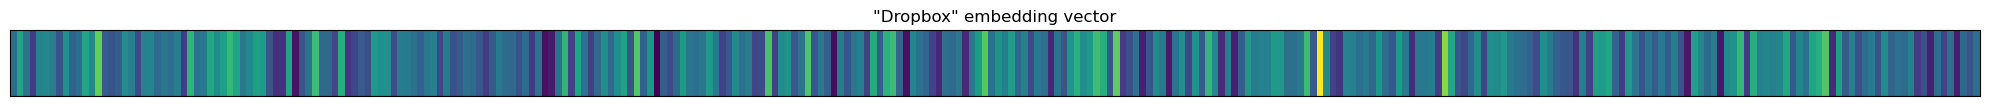

In [237]:
word_list = ['Dropbox']

plt.subplots(len(word_list), 1, figsize=(20, 5))

for i, word in enumerate(word_list):
    plt.subplot(len(word_list), 1, i + 1)
    plt.imshow(np.tile(sentence2vec(df['long_description'][0]), (10, 1)))
    plt.xticks([])
    plt.yticks([])
    plt.title(f"\"{word}\" embedding vector")

plt.tight_layout()
plt.show()

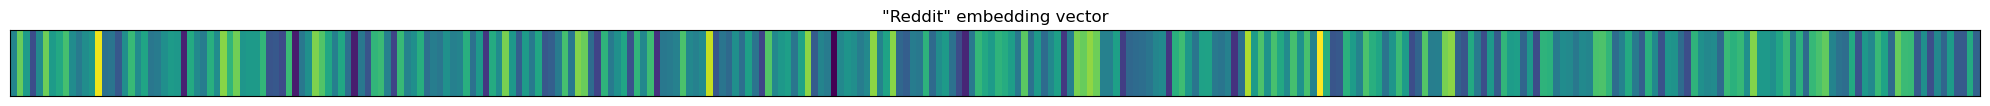

In [238]:
word_list = ['Reddit']

plt.subplots(len(word_list), 1, figsize=(20, 5))

for i, word in enumerate(word_list):
    plt.subplot(len(word_list), 1, i + 1)
    plt.imshow(np.tile(sentence2vec(df['long_description'][1]), (10, 1)))
    plt.xticks([])
    plt.yticks([])
    plt.title(f"\"{word}\" embedding vector")

plt.tight_layout()
plt.show()

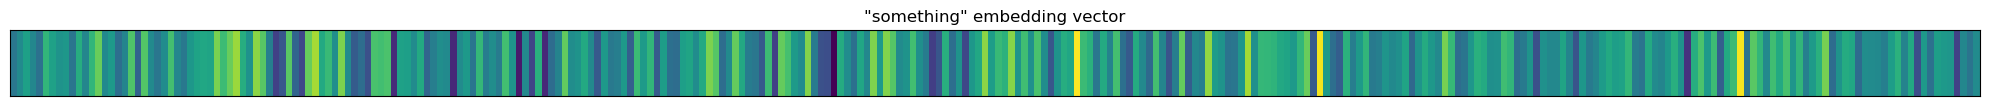

In [236]:
word_list = ['something']

plt.subplots(len(word_list), 1, figsize=(20, 5))

for i, word in enumerate(word_list):
    plt.subplot(len(word_list), 1, i + 1)
    plt.imshow(np.tile(sentence2vec(df['long_description'][1625]), (10, 1)))
    plt.xticks([])
    plt.yticks([])
    plt.title(f"\"{word}\" embedding vector")

plt.tight_layout()
plt.show()

In [162]:
dropbox = sentence2vec(df['long_description'][0])

In [163]:
reddit = sentence2vec(df['long_description'][1])

In [164]:
reddit.shape

(300,)

In [165]:
cosine_distance(dropbox, reddit)

0.26934128999710083

In [170]:
# now create a new dataframe that has all the features from before concatenated with the word embeddings for each row's description
# column names will be embed 1 through 300
embeddings_mean = pd.DataFrame(columns=[str(x) for x in range(1, 301)])

In [171]:
embeddings_mean

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300


In [172]:
for i in range(len(df['long_description'])):
    embeddings_mean.loc[i] = sentence2vec(df['long_description'][i])

In [173]:
embeddings_mean.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,-0.012317,0.057962,-0.004280,-0.065468,0.017166,0.020322,0.010260,-0.041826,0.033459,-0.025339,-0.009442,0.059630,0.019800,0.110621,-0.032039,-0.040040,-0.026598,0.029308,0.012961,-0.051861,0.015379,0.019517,-0.015711,0.000150,-0.009759,0.010246,-0.064791,0.078740,-0.005576,0.002990,0.061068,0.026288,0.051026,0.081943,0.059920,0.002325,0.026035,0.052339,0.046128,-0.038038,-0.077274,-0.075645,0.057859,-0.101632,-0.037460,-0.002661,0.088954,-0.015326,-0.014149,-0.052736,0.069397,-0.072194,-0.052505,-0.030569,-0.046104,0.044662,0.032549,0.034161,-0.046095,0.007733,0.005278,-0.006667,-0.023111,0.001431,0.010152,-0.053458,0.005141,-0.043019,-0.029078,-0.007225,-0.014356,-0.035448,-0.063953,-0.034618,0.004803,-0.013290,-0.015247,-0.042822,-0.011008,-0.068611,-0.004259,-0.103977,-0.096593,-0.004710,0.077831,-0.056452,0.057874,-0.004201,-0.058885,-0.014621,0.029993,-0.011610,0.029127,0.054530,-0.039637,0.103173,-0.024941,0.039605,-0.118019,-0.026757,-0.049257,-0.015806,0.045254,-0.000693,-0.008152,0.002924,0.046726,0.004465,-0.058077,-0.032932,0.023592,-0.006918,0.008864,-0.054953,-0.050144,0.095811,-0.059375,0.028743,0.037478,-0.035895,-0.002667,0.100011,-0.034884,0.006224,-0.027502,-0.107062,0.008726,-0.038902,0.002447,0.011990,-0.059408,0.067119,-0.029586,0.074272,0.087575,-0.016203,-0.104529,0.020069,-0.005061,-0.020290,-0.057631,-0.085919,-0.006956,-0.014459,0.001429,-0.081658,0.005445,0.048047,0.104376,-0.008559,0.037547,0.010641,0.049654,-0.017577,0.012316,-0.051718,0.002168,-0.008770,-0.085678,-0.002870,-0.039238,0.038353,0.073392,0.031152,0.043569,0.090239,0.069478,-0.035440,0.110090,-0.062988,-0.044831,-0.006027,-0.091348,-0.038392,0.023617,0.005190,-0.097036,-0.003612,0.033736,-0.053642,0.035948,-0.031467,0.081459,0.022531,-0.080701,0.013001,-0.092177,-0.027160,0.044867,0.008185,0.012569,0.012237,0.043546,0.043198,-0.007195,-0.006776,0.002999,0.087368,-0.031379,0.182042,0.025828,-0.057733,-0.073188,0.015434,0.013741,-0.008775,0.007391,-0.018836,0.041056,-0.011617,-0.034941,0.046269,0.003306,-0.078995,0.000796,0.003666,0.008780,-0.061906,0.130383,0.063447,-0.039180,-0.053853,-0.015598,0.030893,-0.054284,0.029541,0.025251,0.042739,0.006253,-0.007237,-0.010026,-0.024071,-0.049525,0.031683,0.003890,-0.023990,-0.035286,-0.039391,-0.075753,0.008394,-0.060022,0.051096,0.048220,0.060955,-0.020574,-0.063227,0.044720,-0.000654,-0.039825,-0.000810,-0.030810,0.002471,-0.029655,0.009088,-0.041395,-0.097371,0.054033,0.019108,-0.014010,0.008799,-0.099116,0.022856,0.037290,0.082297,-0.066029,0.068852,0.014328,0.020137,0.010450,0.019573,0.061073,-0.035276,0.019441,-0.003396,0.058954,0.070687,0.101444,-0.082844,0.053795,-0.029197,0.012972,-0.043696,-0.009466,0.004437,-0.044073,0.029016,-0.020407,-0.004954,-0.011953,0.013850,-0.065447,-0.042941,-0.091139,-0.009111,-0.056382,-0.008814,-0.094955,-0.013726,-0.039655,-0.007641
1,-0.012925,0.068325,0.012582,-0.070207,-0.006

In [174]:
embeddings_mean.shape

(4072, 300)

In [175]:
test = mod_df.copy()

In [176]:
test.shape

(4072, 89)

In [177]:
pd.concat([test, embeddings_mean], axis=1)

,team_size,highlight_black,highlight_latinx,highlight_women,top_company,top_company_by_revenue,isHiring,nonprofit,num_former_names,has_logo,has_website,has_one_liner,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,Canada - region,Europe - region,India - region,Latin America - region,United States of America - region,other_region,Unspecified - region,num_regions,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early,success,active,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,4000.0,False,False,False,True,True,False,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,False,1,0,-0.012317,0.057962,-0.004280,-0.065468,0.017166,0.020322,0.010260,-0.041826,0.033459,-0.025339,-0.009442,0.059630,0.019800,0.110621,-0.032039,-0.040040,-0.026598,0.029308,0.012961,-0.051861,0.015379,0.019517,-0.015711,0.000150,-0.009759,0.010246,-0.064791,0.078740,-0.005576,0.002990,0.061068,0.026288,0.051026,0.081943,0.059920,0.002325,0.026035,0.052339,0.046128,-0.038038,-0.077274,-0.075645,0.057859,-0.101632,-0.037460,-0.002661,0.088954,-0.015326,-0.014149,-0.052736,0.069397,-0.072194,-0.052505,-0.030569,-0.046104,0.044662,0.032549,0.034161,-0.046095,0.007733,0.005278,-0.006667,-0.023111,0.001431,0.010152,-0.053458,0.005141,-0.043019,-0.029078,-0.007225,-0.014356,-0.035448,-0.063953,-0.034618,0.004803,-0.013290,-0.015247,-0.042822,-0.011008,-0.068611,-0.004259,-0.103977,-0.096593,-0.004710,0.077831,-0.056452,0.057874,-0.004201,-0.058885,-0.014621,0.029993,-0.011610,0.029127,0.054530,-0.039637,0.103173,-0.024941,0.039605,-0.118019,-0.026757,-0.049257,-0.015806,0.045254,-0.000693,-0.008152,0.002924,0.046726,0.004465,-0.058077,-0.032932,0.023592,-0.006918,0.008864,-0.054953,-0.050144,0.095811,-0.059375,0.028743,0.037478,-0.035895,-0.002667,0.100011,-0.034884,0.006224,-0.027502,-0.107062,0.008726,-0.038902,0.002447,0.011990,-0.059408,0.067119,-0.029586,0.074272,0.087575,-0.016203,-0.104529,0.020069,-0.005061,-0.020290,-0.057631,-0.085919,-

In [179]:
embeddings_mean_df = pd.concat([test, embeddings_mean], axis=1)

In [180]:
embeddings_mean_df.shape

(4072, 389)

In [181]:
# create the initial train and test sets
train = embeddings_mean_df[embeddings_mean_df['active'] == 0]
test = embeddings_mean_df[embeddings_mean_df['active'] == 1]

In [182]:
# drop the active column from these sets
train = train.drop(columns='active')
test = test.drop(columns='active')

In [183]:
# create X and y from train dataframe
X = train.drop(columns='success')
y = train['success']

In [184]:
# do train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistic Regression Model <a class="anchor" id="logregmodel"></a>

In [185]:
# instantiate a logistic regression model
logreg_model = LogisticRegression(max_iter=10000)

# fit it to training data
logreg_model.fit(X_train, y_train)

# score the accuracy of the model
lr_train_score = logreg_model.score(X_train, y_train)
lr_test_score = logreg_model.score(X_test, y_test)

print(f"Score on training set: {lr_train_score}")
print(f"Score on test set: {lr_test_score}")

Score on training set: 0.7536557930258717
Score on test set: 0.672645739910314


In [275]:
# Generate confusion matrix
lr_pred = logreg_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, lr_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Failure", "Predicted Success"],
    index=["True Failure", "True Success"]
)

display(cf_df)

,Predicted Failure,Predicted Success
True Failure,96,26
True Success,36,65


In [276]:
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
print(f'precision = {lr_precision}, recall = {lr_recall}, f1 = {lr_f1}')

precision = 0.7142857142857143, recall = 0.6435643564356436, f1 = 0.6770833333333333


In [277]:
# creating a dataframe of the coefficients
coef = pd.DataFrame(logreg_model.coef_,  columns = X_train.columns)

In [278]:
coef

,team_size,highlight_black,highlight_latinx,highlight_women,top_company,top_company_by_revenue,isHiring,nonprofit,num_former_names,has_logo,has_website,has_one_liner,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,Canada - region,Europe - region,India - region,Latin America - region,United States of America - region,other_region,Unspecified - region,num_regions,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,0.014836,0.058983,0.003637,0.642867,1.574596,0.150562,6.031115e-07,0.145513,-0.105389,0.814051,0.439096,0.812909,1.09314,0.321479,0.627711,-0.187209,0.329988,-0.008995,-0.134255,-0.173809,-0.51045,-0.607272,-0.781506,0.220193,-0.941183,0.462018,0.219602,-0.043273,-0.048359,-0.235319,-0.594887,-0.006504,-0.178004,-0.805312,0.182977,-0.065327,-0.190055,0.319825,0.64417,0.370638,0.494243,-0.281973,-0.092127,0.101335,0.707284,-0.709087,-1.174333,0.325031,-0.279491,0.268267,0.219118,0.112493,0.452915,0.027388,0.155605,0.415747,-0.180151,0.010754,-0.369201,0.473844,-0.341154,0.068034,0.778057,0.308941,0.279076,-0.544893,-0.217575,0.50658,0.235555,0.107141,0.248865,-0.350743,0.526985,0.28806,0.67506,0.363039,-0.129144,0.127087,-0.430741,0.470986,-0.168615,0.481108,-0.209852,-0.352042,0.078918,0.082059,-0.781947,0.116021,0.102196,0.125022,-0.109791,-0.150798,0.090398,-0.449208,-0.140191,0.321688,-0.269477,-0.500971,0.026321,-0.075764,0.22437,-0.097969,-0.330248,-0.297067,-0.270931,0.157518,0.107434,-0.185574,0.699329,0.020456,0.168738,-0.343215,-0.55309,-0.645704,0.076458,-0.053703,-0.082728,0.085792,0.376069,0.533296,-0.1343,0.009599,-0.122491,0.008944,0.065679,0.417993,0.189458,-0.064293,-0.435965,0.137331,0.172101,-0.176781,0.052645,-0.007492,0.227059,0.481327,-0.012267,0.101448,-0.059461,-0.321168,-0.201997,-0.118561,0.252561,0.431152,-0.2216,-0.141229,-0.141882,0.133181,0.224785,0.020042,0.275905,0.660231,0.512992,0.113265,0.558409,-0.095075,-0.15605,-0.053228,-0.255002,-0.142812,-0.128853,0.041052,0.246101,0.146542,0.365889,-0.195451,-0.060164,0.094755,-0.152643,-0.178628,

In [279]:
# adding the odds ratios to the dataframe to look at them side by side with the coefficients
coef.loc[1] = np.exp(logreg_model.coef_)[0]
coef.rename({0:'coefficients', 1:'odds_ratios'}, inplace=True)

In [280]:
# sorting by coefficients, descending --> positively correlates with success
coef.sort_values(axis=1, by='coefficients', ascending=False)

,top_company,"Austin, TX, USA",has_logo,has_one_liner,Healthcare IT,Consumer Finance,22,Payments,273,65,Analytics,highlight_women,"Boston, MA, USA",88,139,68,109,125,33,Open Source,121,66,Infrastructure,B2B,156,258,49,Security,130,Hardware,SaaS,"Toronto, ON, Canada",Education,276,166,255,103,has_website,281,282,154,57,238,39,Fintech,274,269,173,97,193,32,86,242,Artificial Intelligence,299,85,78,Productivity,268,168,101,148,"Los Angeles, CA, USA",131,Content,189,9,"Bengaluru, KA, India",API,247,116,Home and Personal,231,160,290,132,Operations,Housing and Real Estate,64,Data Engineering,298,129,174,56,Marketing,76,84,Logistics,48,111,62,14,"San Francisco, CA, USA",other_city,Developer Tools,289,152,240,40,253,95,num_regions,262,94,44,261,233,24,209,280,19,Finance and Accounting,254,194,208,top_company_by_revenue,170,77,nonprofit,146,223,43,61,292,244,285,153,Real Estate and Construction,137,3,294,114,219,250,142,124,1,263,67,E-commerce,104,133,288,20,Machine Learning,128,2,51,Consumer,81,113,212,6,213,236,31,years_since_founding,200,271,other_tag,28,229,183,122,117,Healthcare,38,226,287,201,highlight_black,252,98,192,198,46,164,144,162,75,149,211,218,178,265,Enterprise,230,12,119,225,23,63,team_size,206,158,222,Gaming,35,207,37,197,highlight_latinx,isHiring,155,United States of America - region,47,"Mexico City, CDMX, Mexico",150,50,107,105,259,286,291,267,257,220,272,248,165,Canada - region,Europe - region,167,217,143,278,71,191,29,110,52,270,80,151,41,num_tags,205,243,241,93,13,163,30,264,126,190,279,138,127,Climate,69,15,num_former_names,195,145,4,91,227,55,221,36,74,89,Proptech,134,"Mountain View, CA, USA",34,90,181,176,8,59,92,60,73,275,232,5,82,70,283,196,Sales,115,184,"New York, NY, USA",45,other_region,83,179,Food and Beverage,186,21,235,"London, England, United Kingdom",AI,185,182,79,157,215,54,228,135,Social,237,136,277,Industrials,199,58,175,214,87,171,123,India - region,177,188,187,169,72,266,96,140,161,224,112,203,210,234,10,18,99,202,Crypto / Web3,Biotech,293,141,251,159,17,216,53,260,16,239,Health Tech,25,Marketplace,Supply Chain and Logistics,108,297,102,Generative AI,147,296,106,246,284,249,295,Retail,42,180,7,118,120,11,"Palo Alto, CA, USA",Human Resources,26,300,172,Latin America - region,"Paris, Île-de-France, France",256,100,27,204,Consumer Health Services,Remote,Early,Unspecified - region,245,"Seattle, WA, USA",Consumer Health and Wellness
coefficients,1.574596,1.093140,0.814051,0.812909,0.778057,0.707284,0.699329,0.67506,0.663315,0.660231,0.644170,0.642867,0.627711,0.569059,0.561641,0.558409,0.549634,0.545109,0.533296,0.526985,0.516842,0.512992,0.506580,0.494243,0.489564,0.481451,0.481327,0.481108,0.475281,0.473844,0.470986,0.462018,0.452915,0.448243,0.447438,0.441178,0.439548,0.439096,0.438305,0.435842,0.431445,0.431152,0.427404,0.417993,0.415747,0.404507,0.387954,0.386302,0.384336,0.378193,0.376069,0.373680,0.373351,0.370638,0.369788,0.368243,0.365889,0.363039,0.360148,0.337395,0.336292,0.333540,0.329988,0.329905,0.325031,0.321731,0.321688,0.321479,0.319825,0.316210,0.314163,0.308941,0.308163,0.307753,0.297923,0.295036,0.288060,0.279076,0.275905,0.268267,0.267734,0.264640,0.263937,0.252561,0.248865,0.246101,0.236956,0.235555,0.227059,0.226079,0.224785,0.224370,0.220193,0.219602,0.219118,0.217678,0.204816,0.194286,0.189458,0.186933,0.186786,0.182977,0.175850,0.172927,0.172101,0.170666,0.169924,0.168738,0.162399,0.162327,0.157518,0.155605,0.155162,0.151743,0.151109,0.150562,0.149392,0.146542,0.145513,0.145268,0.143556,0.137331,0.133181,0.133038,0.131342,0.129347,0.128153,0.127087,0.125314,0.125022,0.124440,0.123332,0.121864,0.121469,0.119401,0.118733,0.116021,0.113388,0.113265,0.112493,0.112137,0.111253,0.107734,0.107434,0.107141,0.102594,0.102196,0.101448,0.101335,0.094755,0.094580,0.094303,0.090398,0.089388,0.087072,0.085792,0.082059,0.081803,0.079704,0.078918,0.076458,0.075385,0.075262,0.072797,0.071738,0.068034,0.065679,0.064517,0.064391,0.06289,0.058983,0.056375,0.053802,0.053751,0.052950,0.052645,0.04

In [281]:
# sorting by coefficients, ascending --> negatively correlates with success
coef.sort_values(axis=1, by='coefficients')

,Consumer Health and Wellness,"Seattle, WA, USA",245,Unspecified - region,Early,Remote,Consumer Health Services,204,27,100,256,"Paris, Île-de-France, France",Latin America - region,172,300,26,Human Resources,"Palo Alto, CA, USA",11,120,118,7,180,42,Retail,295,249,284,246,106,296,147,Generative AI,102,297,108,Supply Chain and Logistics,Marketplace,25,Health Tech,239,16,260,53,216,17,159,251,141,293,Biotech,Crypto / Web3,202,99,18,10,234,210,203,112,224,161,140,96,266,72,169,187,188,177,India - region,123,171,87,214,175,58,199,Industrials,277,136,237,Social,135,228,54,215,157,79,182,185,AI,"London, England, United Kingdom",235,21,186,Food and Beverage,179,83,other_region,45,"New York, NY, USA",184,115,Sales,196,283,70,82,5,232,275,73,60,92,59,8,176,181,90,34,"Mountain View, CA, USA",134,Proptech,89,74,36,221,55,227,91,4,145,195,num_former_names,15,69,Climate,127,138,279,190,126,264,30,163,13,93,241,243,205,num_tags,41,151,80,270,52,110,29,191,71,278,143,217,167,Europe - region,Canada - region,165,248,272,220,257,267,291,286,259,105,107,50,150,"Mexico City, CDMX, Mexico",47,United States of America - region,155,isHiring,highlight_latinx,197,37,207,35,Gaming,222,158,206,team_size,63,23,225,119,12,230,Enterprise,265,178,218,211,149,75,162,144,164,46,198,192,98,252,highlight_black,201,287,226,38,Healthcare,117,122,183,229,28,other_tag,271,200,years_since_founding,31,236,213,6,212,113,81,Consumer,51,2,128,Machine Learning,20,288,133,104,E-commerce,67,263,1,124,142,250,219,114,294,3,137,Real Estate and Construction,153,285,244,292,61,43,223,146,nonprofit,77,170,top_company_by_revenue,208,194,254,Finance and Accounting,19,280,209,24,233,261,44,94,262,num_regions,95,253,40,240,152,289,Developer Tools,other_city,"San Francisco, CA, USA",14,62,111,48,Logistics,84,76,Marketing,56,174,129,298,Data Engineering,64,Housing and Real Estate,Operations,132,290,160,231,Home and Personal,116,247,API,"Bengaluru, KA, India",9,189,Content,131,"Los Angeles, CA, USA",148,101,168,268,Productivity,78,85,299,Artificial Intelligence,242,86,32,193,97,173,269,274,Fintech,39,238,57,154,282,281,has_website,103,255,166,276,Education,"Toronto, ON, Canada",SaaS,Hardware,130,Security,49,258,156,B2B,Infrastructure,66,121,Open Source,33,125,109,68,139,88,"Boston, MA, USA",highlight_women,Analytics,65,273,Payments,22,Consumer Finance,Healthcare IT,has_one_liner,has_logo,"Austin, TX, USA",top_company
coefficients,-1.174333,-0.941183,-0.807535,-0.805312,-0.781947,-0.781506,-0.709087,-0.668510,-0.645704,-0.636318,-0.630441,-0.607272,-0.594887,-0.574110,-0.566963,-0.55309,-0.544893,-0.510450,-0.500971,-0.453606,-0.452409,-0.449208,-0.447188,-0.435965,-0.430741,-0.428339,-0.428320,-0.400431,-0.399550,-0.395489,-0.385296,-0.372858,-0.369201,-0.368604,-0.367293,-0.357515,-0.352042,-0.350743,-0.343215,-0.341154,-0.330861,-0.330248,-0.322993,-0.321168,-0.317321,-0.297067,-0.294448,-0.293139,-0.285967,-0.285872,-0.281973,-0.279491,-0.277103,-0.275151,-0.270931,-0.269477,-0.267511,-0.267000,-0.265811,-0.264936,-0.264710,-0.261288,-0.258302,-0.258062,-0.255521,-0.255002,-0.254978,-0.250686,-0.236472,-0.236310,-0.235319,-0.233114,-0.231608,-0.229908,-0.222614,-0.222461,-0.221600,-0.220276,-0.217575,-0.217103,-0.215995,-0.212931,-0.209852,-0.205103,-0.204713,-0.201997,-0.197830,-0.197658,-0.195451,-0.195330,-0.194322,-0.190055,-0.187209,-0.185675,-0.185574,-0.181937,-0.180151,-0.178965,-0.178628,-0.178004,-0.176781,-0.173809,-0.172854,-0.171864,-0.168615,-0.160681,-0.159254,-0.156050,-0.152643,-0.150798,-0.150097,-0.143166,-0.142812,-0.141882,-0.141687,-0.141229,-0.140191,-0.138555,-0.136971,-0.135591,-0.134300,-0.134255,-0.131051,-0.129144,-0.129025,-0.128853,-0.122491,-0.121889,-0.118561,-0.115880,-0.114551,-0.109791,-0.109225,-0.107838,-0.105389,-0.097969,-0.095075,-0.092127,-0.091206,-0.089859,-0.088362,-0.086818,-0.084910,-0.084125,-0.082728,-0.082277,-0.075764,-0.074972,-0.067736,-0.066224,-0.065633,-0.065327,-0.064293,-0.063527,-0.060164,-0.059626,-0.059461,-0.058959,-0.0537

## Decision Tree Model <a class="anchor" id="dtmodel"></a>

In [282]:
# instantiate decision tree
dt_model = DecisionTreeClassifier(max_depth=7)

# fit it to training data
dt_model.fit(X_train, y_train)

# score the accuracy
dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)

print(f"Score on training set: {dt_train_score}")
print(f"Score on test set: {dt_test_score}")

Score on training set: 0.8976377952755905
Score on test set: 0.6502242152466368


In [283]:
dt_pred = dt_model.predict(X_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
print(f'precision = {dt_precision}, recall = {dt_recall}, f1 = {dt_f1}')

precision = 0.6236559139784946, recall = 0.5742574257425742, f1 = 0.5979381443298969


## Random Forest Model <a class="anchor" id="rfmodel"></a>

In [284]:
# instantiate
rf_model = RandomForestClassifier(n_estimators=50, max_depth=9)

# fit
rf_model.fit(X_train, y_train)

# score
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

print(f"Score on training set: {rf_train_score}")
print(f"Score on test set: {rf_test_score}")

Score on training set: 0.9966254218222722
Score on test set: 0.6591928251121076


In [285]:
rf_pred = rf_model.predict(X_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f'precision = {rf_precision}, recall = {rf_recall}, f1 = {rf_f1}')

precision = 0.6984126984126984, recall = 0.43564356435643564, f1 = 0.5365853658536586


## Support Vector Machine Model <a class="anchor" id="svmmodel"></a>

In [286]:
# instantiate
svm_model = LinearSVC(dual='auto')

# fit
svm_model.fit(X_train, y_train)

# score
svm_train_score = svm_model.score(X_train, y_train)
svm_test_score = svm_model.score(X_test, y_test)

print(f"Score on training set: {svm_train_score}")
print(f"Score on test set: {svm_test_score}")

Score on training set: 0.8098987626546682
Score on test set: 0.7040358744394619


In [287]:
svm_pred = svm_model.predict(X_test)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print(f'precision = {svm_precision}, recall = {svm_recall}, f1 = {svm_f1}')

precision = 0.7011494252873564, recall = 0.6039603960396039, f1 = 0.648936170212766


In [288]:
# instantiate
svc_model = SVC()

# fit
svc_model.fit(X_train, y_train)

# score
svc_train_score = svc_model.score(X_train, y_train)
svc_test_score = svc_model.score(X_test, y_test)

print(f"Score on training set: {svc_train_score}")
print(f"Score on test set: {svc_test_score}")

Score on training set: 0.6186726659167604
Score on test set: 0.6457399103139013


In [289]:
svc_pred = svc_model.predict(X_test)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
print(f'precision = {svc_precision}, recall = {svc_recall}, f1 = {svc_f1}')

precision = 0.9230769230769231, recall = 0.2376237623762376, f1 = 0.3779527559055118


## Try again with Scaling and PCA

In [331]:
# create the initial train and test sets
train = embeddingsdf[embeddingsdf['active'] == 0]
test = embeddingsdf[embeddingsdf['active'] == 1]

In [332]:
# drop the active column from these sets
train = train.drop(columns='active')
test = test.drop(columns='active')

In [333]:
# create X and y from train dataframe
X = train.drop(columns='success')
y = train['success']

In [334]:
# do train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [335]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [336]:
# Instantiate & fit PCA model
# Default n_components will generate the same number of PCs as you have features 
my_PCA = PCA()
my_PCA.fit(X_train)

# transform data 
X_train_PCA = my_PCA.transform(X_train)
X_test_PCA = my_PCA.transform(X_test)

In [337]:
print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")
print(f"Proportion of variance captured by PC3: {my_PCA.explained_variance_ratio_[2]: 0.3f}")
print(f"Proportion of variance captured by PC4: {my_PCA.explained_variance_ratio_[3]: 0.3f}")

Variance captured by PC1:  24.504
Variance captured by PC2:  18.379
Proportion of variance captured by PC1:  0.063
Proportion of variance captured by PC2:  0.047
Proportion of variance captured by PC3:  0.039
Proportion of variance captured by PC4:  0.034


In [338]:
expl_var = my_PCA.explained_variance_ratio_

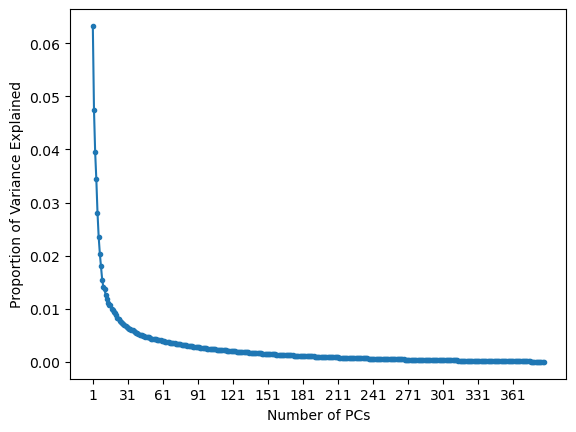

In [339]:
plt.figure()
plt.plot(range(1,388),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,388,30))
plt.show()

In [311]:
# Instantiate & fit PCA model with 61 components
my_PCA = PCA(n_components = 61)
my_PCA.fit(X_train)

# transform data 
X_train = my_PCA.transform(X_train)
X_test = my_PCA.transform(X_test)

## Logistic Regression Model <a class="anchor" id="logregmodel"></a>

In [312]:
# instantiate a logistic regression model
logreg_model = LogisticRegression(max_iter=10000)

# fit it to training data
logreg_model.fit(X_train, y_train)

# score the accuracy of the model
lr_train_score = logreg_model.score(X_train, y_train)
lr_test_score = logreg_model.score(X_test, y_test)

print(f"Score on training set: {lr_train_score}")
print(f"Score on test set: {lr_test_score}")

Score on training set: 0.7109111361079865
Score on test set: 0.672645739910314


In [313]:
# Generate confusion matrix
lr_pred = logreg_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, lr_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Failure", "Predicted Success"],
    index=["True Failure", "True Success"]
)

display(cf_df)

,Predicted Failure,Predicted Success
True Failure,90,42
True Success,31,60


In [314]:
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
print(f'precision = {lr_precision}, recall = {lr_recall}, f1 = {lr_f1}')

precision = 0.5882352941176471, recall = 0.6593406593406593, f1 = 0.6217616580310881


In [277]:
# creating a dataframe of the coefficients
coef = pd.DataFrame(logreg_model.coef_,  columns = X_train.columns)

In [278]:
coef

,team_size,highlight_black,highlight_latinx,highlight_women,top_company,top_company_by_revenue,isHiring,nonprofit,num_former_names,has_logo,has_website,has_one_liner,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,Canada - region,Europe - region,India - region,Latin America - region,United States of America - region,other_region,Unspecified - region,num_regions,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,0.014836,0.058983,0.003637,0.642867,1.574596,0.150562,6.031115e-07,0.145513,-0.105389,0.814051,0.439096,0.812909,1.09314,0.321479,0.627711,-0.187209,0.329988,-0.008995,-0.134255,-0.173809,-0.51045,-0.607272,-0.781506,0.220193,-0.941183,0.462018,0.219602,-0.043273,-0.048359,-0.235319,-0.594887,-0.006504,-0.178004,-0.805312,0.182977,-0.065327,-0.190055,0.319825,0.64417,0.370638,0.494243,-0.281973,-0.092127,0.101335,0.707284,-0.709087,-1.174333,0.325031,-0.279491,0.268267,0.219118,0.112493,0.452915,0.027388,0.155605,0.415747,-0.180151,0.010754,-0.369201,0.473844,-0.341154,0.068034,0.778057,0.308941,0.279076,-0.544893,-0.217575,0.50658,0.235555,0.107141,0.248865,-0.350743,0.526985,0.28806,0.67506,0.363039,-0.129144,0.127087,-0.430741,0.470986,-0.168615,0.481108,-0.209852,-0.352042,0.078918,0.082059,-0.781947,0.116021,0.102196,0.125022,-0.109791,-0.150798,0.090398,-0.449208,-0.140191,0.321688,-0.269477,-0.500971,0.026321,-0.075764,0.22437,-0.097969,-0.330248,-0.297067,-0.270931,0.157518,0.107434,-0.185574,0.699329,0.020456,0.168738,-0.343215,-0.55309,-0.645704,0.076458,-0.053703,-0.082728,0.085792,0.376069,0.533296,-0.1343,0.009599,-0.122491,0.008944,0.065679,0.417993,0.189458,-0.064293,-0.435965,0.137331,0.172101,-0.176781,0.052645,-0.007492,0.227059,0.481327,-0.012267,0.101448,-0.059461,-0.321168,-0.201997,-0.118561,0.252561,0.431152,-0.2216,-0.141229,-0.141882,0.133181,0.224785,0.020042,0.275905,0.660231,0.512992,0.113265,0.558409,-0.095075,-0.15605,-0.053228,-0.255002,-0.142812,-0.128853,0.041052,0.246101,0.146542,0.365889,-0.195451,-0.060164,0.094755,-0.152643,-0.178628,

In [279]:
# adding the odds ratios to the dataframe to look at them side by side with the coefficients
coef.loc[1] = np.exp(logreg_model.coef_)[0]
coef.rename({0:'coefficients', 1:'odds_ratios'}, inplace=True)

In [280]:
# sorting by coefficients, descending --> positively correlates with success
coef.sort_values(axis=1, by='coefficients', ascending=False)

,top_company,"Austin, TX, USA",has_logo,has_one_liner,Healthcare IT,Consumer Finance,22,Payments,273,65,Analytics,highlight_women,"Boston, MA, USA",88,139,68,109,125,33,Open Source,121,66,Infrastructure,B2B,156,258,49,Security,130,Hardware,SaaS,"Toronto, ON, Canada",Education,276,166,255,103,has_website,281,282,154,57,238,39,Fintech,274,269,173,97,193,32,86,242,Artificial Intelligence,299,85,78,Productivity,268,168,101,148,"Los Angeles, CA, USA",131,Content,189,9,"Bengaluru, KA, India",API,247,116,Home and Personal,231,160,290,132,Operations,Housing and Real Estate,64,Data Engineering,298,129,174,56,Marketing,76,84,Logistics,48,111,62,14,"San Francisco, CA, USA",other_city,Developer Tools,289,152,240,40,253,95,num_regions,262,94,44,261,233,24,209,280,19,Finance and Accounting,254,194,208,top_company_by_revenue,170,77,nonprofit,146,223,43,61,292,244,285,153,Real Estate and Construction,137,3,294,114,219,250,142,124,1,263,67,E-commerce,104,133,288,20,Machine Learning,128,2,51,Consumer,81,113,212,6,213,236,31,years_since_founding,200,271,other_tag,28,229,183,122,117,Healthcare,38,226,287,201,highlight_black,252,98,192,198,46,164,144,162,75,149,211,218,178,265,Enterprise,230,12,119,225,23,63,team_size,206,158,222,Gaming,35,207,37,197,highlight_latinx,isHiring,155,United States of America - region,47,"Mexico City, CDMX, Mexico",150,50,107,105,259,286,291,267,257,220,272,248,165,Canada - region,Europe - region,167,217,143,278,71,191,29,110,52,270,80,151,41,num_tags,205,243,241,93,13,163,30,264,126,190,279,138,127,Climate,69,15,num_former_names,195,145,4,91,227,55,221,36,74,89,Proptech,134,"Mountain View, CA, USA",34,90,181,176,8,59,92,60,73,275,232,5,82,70,283,196,Sales,115,184,"New York, NY, USA",45,other_region,83,179,Food and Beverage,186,21,235,"London, England, United Kingdom",AI,185,182,79,157,215,54,228,135,Social,237,136,277,Industrials,199,58,175,214,87,171,123,India - region,177,188,187,169,72,266,96,140,161,224,112,203,210,234,10,18,99,202,Crypto / Web3,Biotech,293,141,251,159,17,216,53,260,16,239,Health Tech,25,Marketplace,Supply Chain and Logistics,108,297,102,Generative AI,147,296,106,246,284,249,295,Retail,42,180,7,118,120,11,"Palo Alto, CA, USA",Human Resources,26,300,172,Latin America - region,"Paris, Île-de-France, France",256,100,27,204,Consumer Health Services,Remote,Early,Unspecified - region,245,"Seattle, WA, USA",Consumer Health and Wellness
coefficients,1.574596,1.093140,0.814051,0.812909,0.778057,0.707284,0.699329,0.67506,0.663315,0.660231,0.644170,0.642867,0.627711,0.569059,0.561641,0.558409,0.549634,0.545109,0.533296,0.526985,0.516842,0.512992,0.506580,0.494243,0.489564,0.481451,0.481327,0.481108,0.475281,0.473844,0.470986,0.462018,0.452915,0.448243,0.447438,0.441178,0.439548,0.439096,0.438305,0.435842,0.431445,0.431152,0.427404,0.417993,0.415747,0.404507,0.387954,0.386302,0.384336,0.378193,0.376069,0.373680,0.373351,0.370638,0.369788,0.368243,0.365889,0.363039,0.360148,0.337395,0.336292,0.333540,0.329988,0.329905,0.325031,0.321731,0.321688,0.321479,0.319825,0.316210,0.314163,0.308941,0.308163,0.307753,0.297923,0.295036,0.288060,0.279076,0.275905,0.268267,0.267734,0.264640,0.263937,0.252561,0.248865,0.246101,0.236956,0.235555,0.227059,0.226079,0.224785,0.224370,0.220193,0.219602,0.219118,0.217678,0.204816,0.194286,0.189458,0.186933,0.186786,0.182977,0.175850,0.172927,0.172101,0.170666,0.169924,0.168738,0.162399,0.162327,0.157518,0.155605,0.155162,0.151743,0.151109,0.150562,0.149392,0.146542,0.145513,0.145268,0.143556,0.137331,0.133181,0.133038,0.131342,0.129347,0.128153,0.127087,0.125314,0.125022,0.124440,0.123332,0.121864,0.121469,0.119401,0.118733,0.116021,0.113388,0.113265,0.112493,0.112137,0.111253,0.107734,0.107434,0.107141,0.102594,0.102196,0.101448,0.101335,0.094755,0.094580,0.094303,0.090398,0.089388,0.087072,0.085792,0.082059,0.081803,0.079704,0.078918,0.076458,0.075385,0.075262,0.072797,0.071738,0.068034,0.065679,0.064517,0.064391,0.06289,0.058983,0.056375,0.053802,0.053751,0.052950,0.052645,0.04

In [281]:
# sorting by coefficients, ascending --> negatively correlates with success
coef.sort_values(axis=1, by='coefficients')

,Consumer Health and Wellness,"Seattle, WA, USA",245,Unspecified - region,Early,Remote,Consumer Health Services,204,27,100,256,"Paris, Île-de-France, France",Latin America - region,172,300,26,Human Resources,"Palo Alto, CA, USA",11,120,118,7,180,42,Retail,295,249,284,246,106,296,147,Generative AI,102,297,108,Supply Chain and Logistics,Marketplace,25,Health Tech,239,16,260,53,216,17,159,251,141,293,Biotech,Crypto / Web3,202,99,18,10,234,210,203,112,224,161,140,96,266,72,169,187,188,177,India - region,123,171,87,214,175,58,199,Industrials,277,136,237,Social,135,228,54,215,157,79,182,185,AI,"London, England, United Kingdom",235,21,186,Food and Beverage,179,83,other_region,45,"New York, NY, USA",184,115,Sales,196,283,70,82,5,232,275,73,60,92,59,8,176,181,90,34,"Mountain View, CA, USA",134,Proptech,89,74,36,221,55,227,91,4,145,195,num_former_names,15,69,Climate,127,138,279,190,126,264,30,163,13,93,241,243,205,num_tags,41,151,80,270,52,110,29,191,71,278,143,217,167,Europe - region,Canada - region,165,248,272,220,257,267,291,286,259,105,107,50,150,"Mexico City, CDMX, Mexico",47,United States of America - region,155,isHiring,highlight_latinx,197,37,207,35,Gaming,222,158,206,team_size,63,23,225,119,12,230,Enterprise,265,178,218,211,149,75,162,144,164,46,198,192,98,252,highlight_black,201,287,226,38,Healthcare,117,122,183,229,28,other_tag,271,200,years_since_founding,31,236,213,6,212,113,81,Consumer,51,2,128,Machine Learning,20,288,133,104,E-commerce,67,263,1,124,142,250,219,114,294,3,137,Real Estate and Construction,153,285,244,292,61,43,223,146,nonprofit,77,170,top_company_by_revenue,208,194,254,Finance and Accounting,19,280,209,24,233,261,44,94,262,num_regions,95,253,40,240,152,289,Developer Tools,other_city,"San Francisco, CA, USA",14,62,111,48,Logistics,84,76,Marketing,56,174,129,298,Data Engineering,64,Housing and Real Estate,Operations,132,290,160,231,Home and Personal,116,247,API,"Bengaluru, KA, India",9,189,Content,131,"Los Angeles, CA, USA",148,101,168,268,Productivity,78,85,299,Artificial Intelligence,242,86,32,193,97,173,269,274,Fintech,39,238,57,154,282,281,has_website,103,255,166,276,Education,"Toronto, ON, Canada",SaaS,Hardware,130,Security,49,258,156,B2B,Infrastructure,66,121,Open Source,33,125,109,68,139,88,"Boston, MA, USA",highlight_women,Analytics,65,273,Payments,22,Consumer Finance,Healthcare IT,has_one_liner,has_logo,"Austin, TX, USA",top_company
coefficients,-1.174333,-0.941183,-0.807535,-0.805312,-0.781947,-0.781506,-0.709087,-0.668510,-0.645704,-0.636318,-0.630441,-0.607272,-0.594887,-0.574110,-0.566963,-0.55309,-0.544893,-0.510450,-0.500971,-0.453606,-0.452409,-0.449208,-0.447188,-0.435965,-0.430741,-0.428339,-0.428320,-0.400431,-0.399550,-0.395489,-0.385296,-0.372858,-0.369201,-0.368604,-0.367293,-0.357515,-0.352042,-0.350743,-0.343215,-0.341154,-0.330861,-0.330248,-0.322993,-0.321168,-0.317321,-0.297067,-0.294448,-0.293139,-0.285967,-0.285872,-0.281973,-0.279491,-0.277103,-0.275151,-0.270931,-0.269477,-0.267511,-0.267000,-0.265811,-0.264936,-0.264710,-0.261288,-0.258302,-0.258062,-0.255521,-0.255002,-0.254978,-0.250686,-0.236472,-0.236310,-0.235319,-0.233114,-0.231608,-0.229908,-0.222614,-0.222461,-0.221600,-0.220276,-0.217575,-0.217103,-0.215995,-0.212931,-0.209852,-0.205103,-0.204713,-0.201997,-0.197830,-0.197658,-0.195451,-0.195330,-0.194322,-0.190055,-0.187209,-0.185675,-0.185574,-0.181937,-0.180151,-0.178965,-0.178628,-0.178004,-0.176781,-0.173809,-0.172854,-0.171864,-0.168615,-0.160681,-0.159254,-0.156050,-0.152643,-0.150798,-0.150097,-0.143166,-0.142812,-0.141882,-0.141687,-0.141229,-0.140191,-0.138555,-0.136971,-0.135591,-0.134300,-0.134255,-0.131051,-0.129144,-0.129025,-0.128853,-0.122491,-0.121889,-0.118561,-0.115880,-0.114551,-0.109791,-0.109225,-0.107838,-0.105389,-0.097969,-0.095075,-0.092127,-0.091206,-0.089859,-0.088362,-0.086818,-0.084910,-0.084125,-0.082728,-0.082277,-0.075764,-0.074972,-0.067736,-0.066224,-0.065633,-0.065327,-0.064293,-0.063527,-0.060164,-0.059626,-0.059461,-0.058959,-0.0537

## Decision Tree Model <a class="anchor" id="dtmodel"></a>

In [315]:
# instantiate decision tree
dt_model = DecisionTreeClassifier(max_depth=7)

# fit it to training data
dt_model.fit(X_train, y_train)

# score the accuracy
dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)

print(f"Score on training set: {dt_train_score}")
print(f"Score on test set: {dt_test_score}")

Score on training set: 0.8481439820022497
Score on test set: 0.5067264573991032


In [316]:
dt_pred = dt_model.predict(X_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
print(f'precision = {dt_precision}, recall = {dt_recall}, f1 = {dt_f1}')

precision = 0.42748091603053434, recall = 0.6153846153846154, f1 = 0.5045045045045046


## Random Forest Model <a class="anchor" id="rfmodel"></a>

In [317]:
# instantiate
rf_model = RandomForestClassifier(n_estimators=50, max_depth=9)

# fit
rf_model.fit(X_train, y_train)

# score
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

print(f"Score on training set: {rf_train_score}")
print(f"Score on test set: {rf_test_score}")

Score on training set: 0.9977502812148481
Score on test set: 0.5739910313901345


In [318]:
rf_pred = rf_model.predict(X_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f'precision = {rf_precision}, recall = {rf_recall}, f1 = {rf_f1}')

precision = 0.47619047619047616, recall = 0.43956043956043955, f1 = 0.45714285714285713


## Support Vector Machine Model <a class="anchor" id="svmmodel"></a>

In [319]:
# instantiate
svm_model = LinearSVC(dual='auto')

# fit
svm_model.fit(X_train, y_train)

# score
svm_train_score = svm_model.score(X_train, y_train)
svm_test_score = svm_model.score(X_test, y_test)

print(f"Score on training set: {svm_train_score}")
print(f"Score on test set: {svm_test_score}")

Score on training set: 0.7041619797525309
Score on test set: 0.6681614349775785


In [320]:
svm_pred = svm_model.predict(X_test)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print(f'precision = {svm_precision}, recall = {svm_recall}, f1 = {svm_f1}')

precision = 0.5825242718446602, recall = 0.6593406593406593, f1 = 0.6185567010309277


In [321]:
# instantiate
svc_model = SVC()

# fit
svc_model.fit(X_train, y_train)

# score
svc_train_score = svc_model.score(X_train, y_train)
svc_test_score = svc_model.score(X_test, y_test)

print(f"Score on training set: {svc_train_score}")
print(f"Score on test set: {svc_test_score}")

Score on training set: 0.829021372328459
Score on test set: 0.6053811659192825


In [322]:
svc_pred = svc_model.predict(X_test)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
print(f'precision = {svc_precision}, recall = {svc_recall}, f1 = {svc_f1}')

precision = 0.5164835164835165, recall = 0.5164835164835165, f1 = 0.5164835164835165


## Sum Embeddings

In [191]:
def sentence2vecsum(text):
    """
    Embed a sentence by averaging the word vectors of the tokenized text. Out-of-vocabulary words are replaced by the zero-vector.
    -----
    
    Input: text (string)
    Output: embedding vector (np.array)
    """
    tokenized = simple_preprocess(text)
    
    word_embeddings = [np.zeros(300)]
    for word in tokenized:
        # if the word is in the model then embed
        if word in model:
            vector = model[word]
        # add zeros for out-of-vocab words
        else:
            vector = np.zeros(300)
            
        word_embeddings.append(vector)
    
    # average the word vectors
    sentence_embedding = np.stack(word_embeddings).sum(axis=0)
    
    return sentence_embedding

In [186]:
# now create a new dataframe that has all the features from before concatenated with the word embeddings for each row's description
# column names will be embed 1 through 300
embeddings_sum = pd.DataFrame(columns=[str(x) for x in range(1, 301)])

In [187]:
embeddings_sum

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300


In [192]:
for i in range(len(df['long_description'])):
    embeddings_sum.loc[i] = sentence2vecsum(df['long_description'][i])

In [193]:
embeddings_sum.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,-1.268651,5.970101,-0.440799,-6.743250,1.768127,2.093133,1.056798,-4.308092,3.446242,-2.609892,-0.972562,6.141873,2.039382,11.393978,-3.300031,-4.124100,-2.739594,3.018714,1.334937,-5.341649,1.584060,2.010300,-1.618221,0.015461,-1.005196,1.055306,-6.673509,8.110181,-0.574344,0.307936,6.290023,2.707621,5.255672,8.440093,6.171716,0.239472,2.681556,5.390886,4.751216,-3.917870,-7.959219,-7.791448,5.959460,-10.468126,-3.858346,-0.274079,9.162241,-1.578599,-1.457297,-5.431804,7.147917,-7.436001,-5.407974,-3.148654,-4.748721,4.600156,3.352518,3.518552,-4.747816,0.796457,0.543613,-0.686700,-2.380407,0.147422,1.045654,-5.506210,0.529551,-4.430912,-2.995082,-0.744162,-1.478617,-3.651142,-6.587148,-3.565641,0.494734,-1.368916,-1.570418,-4.410715,-1.133843,-7.066958,-0.438705,-10.709605,-9.949104,-0.485126,8.016594,-5.814549,5.961042,-0.432721,-6.065140,-1.505950,3.089243,-1.195805,3.000094,5.616547,-4.082639,10.626817,-2.568942,4.079327,-12.155958,-2.756004,-5.073489,-1.627989,4.661212,-0.071412,-0.839647,0.301178,4.812771,0.459936,-5.981941,-3.391972,2.430007,-0.712557,0.913017,-5.660128,-5.164882,9.868553,-6.115645,2.960543,3.860211,-3.697190,-0.274750,10.301146,-3.593090,0.641063,-2.832707,-11.027386,0.898823,-4.006862,0.252083,1.234923,-6.119022,6.913298,-3.047370,7.649989,9.020250,-1.668883,-10.766460,2.067136,-0.521284,-2.089844,-5.936007,-8.849673,-0.716497,-1.489301,0.147219,-8.410789,0.560864,4.948871,10.750731,-0.881586,3.867348,1.096052,5.114333,-1.810452,1.268545,-5.326959,0.223326,-0.903264,-8.824803,-0.295638,-4.041534,3.950325,7.559373,3.208637,4.487624,9.294572,7.156190,-3.650342,11.339269,-6.487728,-4.617587,-0.620731,-9.408804,-3.954410,2.432592,0.534564,-9.994742,-0.371995,3.474782,-5.525152,3.702639,-3.241066,8.390245,2.320679,-8.312160,1.339145,-9.494215,-2.797462,4.621313,0.843034,1.294652,1.260415,4.485192,4.449345,-0.741112,-0.697906,0.308939,8.998926,-3.232064,18.750303,2.660288,-5.946526,-7.538390,1.589671,1.415296,-0.903821,0.761320,-1.940155,4.228744,-1.196575,-3.598956,4.765695,0.340550,-8.136535,0.081949,0.377623,0.904370,-6.376336,13.429451,6.535088,-4.035547,-5.546854,-1.606577,3.181950,-5.591217,3.042760,2.600817,4.402094,0.644029,-0.745457,-1.032689,-2.479300,-5.101062,3.263393,0.400699,-2.470933,-3.634429,-4.057301,-7.802523,0.864607,-6.182226,5.262911,4.966702,6.278386,-2.119153,-6.512342,4.606111,-0.067397,-4.102004,-0.083437,-3.173392,0.254536,-3.054415,0.936057,-4.263664,-10.029236,5.565361,1.968137,-1.443054,0.906344,-10.208923,2.354219,3.840870,8.476542,-6.800951,7.091716,1.475768,2.074097,1.076319,2.016006,6.290507,-3.633453,2.002412,-0.349813,6.072211,7.280733,10.448703,-8.532925,5.540895,-3.007317,1.336105,-4.500734,-0.975030,0.457062,-4.539508,2.988677,-2.101893,-0.510237,-1.231150,1.426536,-6.741088,-4.422890,-9.387280,-0.938484,-5.807323,-0.907831,-9.780391,-1.413745,-4.084496,-0.787056
1,-0.982336,5.192721,0.956210,-

In [194]:
embeddings_sum.shape

(4072, 300)

In [195]:
test = mod_df.copy()

In [196]:
test.shape

(4072, 89)

In [197]:
pd.concat([test, embeddings_sum], axis=1)

,team_size,highlight_black,highlight_latinx,highlight_women,top_company,top_company_by_revenue,isHiring,nonprofit,num_former_names,has_logo,has_website,has_one_liner,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,Canada - region,Europe - region,India - region,Latin America - region,United States of America - region,other_region,Unspecified - region,num_regions,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early,success,active,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,4000.0,False,False,False,True,True,False,False,0,True,True,True,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,False,1,0,-1.268651,5.970101,-0.440799,-6.743250,1.768127,2.093133,1.056798,-4.308092,3.446242,-2.609892,-0.972562,6.141873,2.039382,11.393978,-3.300031,-4.124100,-2.739594,3.018714,1.334937,-5.341649,1.584060,2.010300,-1.618221,0.015461,-1.005196,1.055306,-6.673509,8.110181,-0.574344,0.307936,6.290023,2.707621,5.255672,8.440093,6.171716,0.239472,2.681556,5.390886,4.751216,-3.917870,-7.959219,-7.791448,5.959460,-10.468126,-3.858346,-0.274079,9.162241,-1.578599,-1.457297,-5.431804,7.147917,-7.436001,-5.407974,-3.148654,-4.748721,4.600156,3.352518,3.518552,-4.747816,0.796457,0.543613,-0.686700,-2.380407,0.147422,1.045654,-5.506210,0.529551,-4.430912,-2.995082,-0.744162,-1.478617,-3.651142,-6.587148,-3.565641,0.494734,-1.368916,-1.570418,-4.410715,-1.133843,-7.066958,-0.438705,-10.709605,-9.949104,-0.485126,8.016594,-5.814549,5.961042,-0.432721,-6.065140,-1.505950,3.089243,-1.195805,3.000094,5.616547,-4.082639,10.626817,-2.568942,4.079327,-12.155958,-2.756004,-5.073489,-1.627989,4.661212,-0.071412,-0.839647,0.301178,4.812771,0.459936,-5.981941,-3.391972,2.430007,-0.712557,0.913017,-5.660128,-5.164882,9.868553,-6.115645,2.960543,3.860211,-3.697190,-0.274750,10.301146,-3.593090,0.641063,-2.832707,-11.027386,0.898823,-4.006862,0.252083,1.234923,-6.119022,6.913298,-3.047370,7.649989,9.020250,-1.668883,-10.766460,2.067136,-0.521284,-2.089844,-5.936007,-8.

In [198]:
embeddings_sum_df = pd.concat([test, embeddings_sum], axis=1)

In [199]:
embeddings_sum_df.shape

(4072, 389)

In [200]:
# create the initial train and test sets
train = embeddings_sum_df[embeddings_sum_df['active'] == 0]
test = embeddings_sum_df[embeddings_sum_df['active'] == 1]

In [201]:
# drop the active column from these sets
train = train.drop(columns='active')
test = test.drop(columns='active')

In [202]:
# create X and y from train dataframe
X = train.drop(columns='success')
y = train['success']

In [203]:
# do train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistic Regression Model <a class="anchor" id="logregmodel"></a>

In [204]:
# instantiate a logistic regression model
logreg_model = LogisticRegression(max_iter=10000)

# fit it to training data
logreg_model.fit(X_train, y_train)

# score the accuracy of the model
lr_train_score = logreg_model.score(X_train, y_train)
lr_test_score = logreg_model.score(X_test, y_test)

print(f"Score on training set: {lr_train_score}")
print(f"Score on test set: {lr_test_score}")

Score on training set: 0.9010123734533183
Score on test set: 0.6053811659192825


In [205]:
# Generate confusion matrix
lr_pred = logreg_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, lr_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Failure", "Predicted Success"],
    index=["True Failure", "True Success"]
)

display(cf_df)

,Predicted Failure,Predicted Success
True Failure,77,42
True Success,46,58


In [206]:
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
print(f'precision = {lr_precision}, recall = {lr_recall}, f1 = {lr_f1}')

precision = 0.58, recall = 0.5576923076923077, f1 = 0.5686274509803922


In [207]:
# creating a dataframe of the coefficients
coef = pd.DataFrame(logreg_model.coef_,  columns = X_train.columns)

In [208]:
coef

,team_size,highlight_black,highlight_latinx,highlight_women,top_company,top_company_by_revenue,isHiring,nonprofit,num_former_names,has_logo,has_website,has_one_liner,"Austin, TX, USA","Bengaluru, KA, India","Boston, MA, USA","London, England, United Kingdom","Los Angeles, CA, USA","Mexico City, CDMX, Mexico","Mountain View, CA, USA","New York, NY, USA","Palo Alto, CA, USA","Paris, Île-de-France, France",Remote,"San Francisco, CA, USA","Seattle, WA, USA","Toronto, ON, Canada",other_city,Canada - region,Europe - region,India - region,Latin America - region,United States of America - region,other_region,Unspecified - region,num_regions,num_tags,AI,API,Analytics,Artificial Intelligence,B2B,Biotech,Climate,Consumer,Consumer Finance,Consumer Health Services,Consumer Health and Wellness,Content,Crypto / Web3,Data Engineering,Developer Tools,E-commerce,Education,Enterprise,Finance and Accounting,Fintech,Food and Beverage,Gaming,Generative AI,Hardware,Health Tech,Healthcare,Healthcare IT,Home and Personal,Housing and Real Estate,Human Resources,Industrials,Infrastructure,Logistics,Machine Learning,Marketing,Marketplace,Open Source,Operations,Payments,Productivity,Proptech,Real Estate and Construction,Retail,SaaS,Sales,Security,Social,Supply Chain and Logistics,other_tag,years_since_founding,Early,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,0.061169,0.477724,-0.619178,0.05717,0.92721,-0.000084,0.000007,-0.172127,-0.232322,1.593163,0.389003,1.524847,0.913809,-0.689926,0.537616,0.099213,0.654815,-0.297765,-1.178358,-0.187289,-0.745501,-0.287774,-0.952352,0.097545,-0.527259,0.900094,-0.023972,-0.16391,-0.421919,-0.420459,0.108565,-0.866791,-0.883794,-0.208081,0.553054,-0.041413,-0.369459,-0.370944,0.786097,1.20712,-0.049696,-0.270852,-0.670876,0.161708,-0.293901,-0.150723,-0.28132,0.290478,-0.205141,-0.897668,0.344144,-0.615172,-0.830715,0.60658,-0.11735,0.646289,0.443619,-0.821154,-0.607558,-0.208137,-0.380317,0.224366,0.368259,-0.079231,0.2029,-0.797967,0.603463,0.981647,-0.349904,-0.749651,0.56399,-0.78074,1.29773,1.140488,0.896623,0.85894,-0.054322,-0.736074,-0.712008,0.378178,-0.594386,0.827768,0.00817,-0.181729,-0.332774,0.117438,-1.288691,-0.05975,0.511195,0.137661,-0.086923,-0.014894,0.034098,-0.276046,0.16747,0.0682,-0.503121,-0.281543,0.053817,0.085791,0.013997,-0.086393,-0.005164,-0.168362,-0.112015,0.199467,0.171271,-0.117332,0.221064,0.190342,0.216527,-0.427439,0.293751,0.196423,-0.129842,-0.015842,-0.045686,0.230996,0.434768,0.601733,-0.115929,-0.275348,0.092662,-0.057638,-0.142404,0.576786,-0.09691,0.082837,0.075772,-0.261694,-0.128245,0.374599,0.105883,-0.187726,-0.120278,0.451495,0.021748,-0.36775,0.079246,-0.079749,-0.241661,0.192271,0.362009,0.604294,-0.108162,-0.094104,-0.028818,0.477213,-0.122048,0.128024,0.709159,0.112535,0.100537,0.284774,0.073941,-0.062862,-0.280829,0.087938,0.331197,0.059077,-0.660495,0.239444,0.090252,-0.110074,0.134066,-0.401568,-0.050536,-0.061657,-0.143029,-0.05440

In [209]:
# adding the odds ratios to the dataframe to look at them side by side with the coefficients
coef.loc[1] = np.exp(logreg_model.coef_)[0]
coef.rename({0:'coefficients', 1:'odds_ratios'}, inplace=True)

In [210]:
# sorting by coefficients, descending --> positively correlates with success
coef.sort_values(axis=1, by='coefficients', ascending=False)

,has_logo,has_one_liner,Open Source,Artificial Intelligence,Operations,Infrastructure,top_company,"Austin, TX, USA","Toronto, ON, Canada",Payments,Productivity,Security,Analytics,240,64,177,"Los Angeles, CA, USA",Fintech,150,287,Enterprise,57,Industrials,33,129,121,109,39,282,Marketing,num_regions,"Boston, MA, USA",201,169,2,149,231,159,154,highlight_black,61,197,226,205,49,Food and Beverage,86,32,107,258,254,198,247,115,has_website,131,SaaS,45,269,294,Healthcare IT,56,209,251,128,185,262,Developer Tools,114,196,72,119,252,157,259,281,26,113,146,Content,130,224,168,117,67,242,233,217,289,222,277,75,112,174,250,31,280,232,Healthcare,22,24,84,116,103,137,238,99,Housing and Real Estate,88,255,160,179,19,27,229,55,23,183,293,153,126,20,272,211,8,125,Consumer,187,132,213,173,138,164,151,278,3,78,274,166,158,63,155,92,139,273,years_since_founding,276,65,Latin America - region,96,214,110,203,46,270,219,66,"London, England, United Kingdom","San Francisco, CA, USA",194,36,97,182,76,71,13,41,248,52,162,225,42,257,68,9,249,189,93,team_size,141,73,highlight_women,285,124,12,134,290,235,106,223,6,145,101,243,244,85,50,105,102,14,283,Social,178,191,292,236,isHiring,top_company_by_revenue,111,215,16,133,267,147,275,5,29,142,199,other_city,227,60,234,87,193,num_tags,144,30,268,B2B,80,241,Proptech,83,37,1,81,69,288,108,90,279,Home and Personal,53,271,221,207,15,4,156,59,266,40,192,58,77,18,34,21,Finance and Accounting,148,48,62,122,44,28,206,104,89,263,38,82,123,253,161,Consumer Health Services,297,163,291,186,Canada - region,17,nonprofit,135,216,284,Supply Chain and Logistics,256,212,"New York, NY, USA",47,298,218,Crypto / Web3,246,Unspecified - region,Hardware,184,165,286,95,171,num_former_names,245,91,54,210,43,Biotech,35,7,237,70,Consumer Health and Wellness,11,136,"Paris, Île-de-France, France",180,Consumer Finance,98,220,"Mexico City, CDMX, Mexico",261,181,200,228,118,300,140,143,264,other_tag,94,176,Logistics,51,AI,API,170,Health Tech,167,296,79,127,152,India - region,Europe - region,195,299,25,230,204,265,239,175,120,295,10,"Seattle, WA, USA",188,208,172,100,Sales,Generative AI,E-commerce,highlight_latinx,202,74,Climate,"Bengaluru, KA, India",Retail,Real Estate and Construction,"Palo Alto, CA, USA",Machine Learning,190,Marketplace,Human Resources,Gaming,Education,United States of America - region,other_region,260,Data Engineering,Remote,"Mountain View, CA, USA",Early
coefficients,1.593163,1.524847,1.297730,1.20712,1.140488,0.981647,0.927210,0.913809,0.900094,0.896623,0.858940,0.827768,0.786097,0.723909,0.709159,0.700414,0.654815,0.646289,0.644700,0.636346,0.606580,0.604294,0.603463,0.601733,0.597894,0.594810,0.577362,0.576786,0.576377,0.563990,0.553054,0.537616,0.532796,0.528736,0.511195,0.497926,0.494960,0.487360,0.480402,0.477724,0.477213,0.475394,0.472052,0.460681,0.451495,0.443619,0.43516,0.434768,0.433423,0.430418,0.424260,0.415512,0.404752,0.391155,0.389003,0.381221,0.378178,0.374599,0.370702,0.369412,0.368259,0.362009,0.360112,0.354507,0.352148,0.347439,0.344647,0.344144,0.335539,0.334837,0.331197,0.317581,0.317041,0.315736,0.313125,0.311117,0.293751,0.293317,0.292910,0.290478,0.286941,0.285538,0.285298,0.285002,0.284774,0.281862,0.281401,0.262385,0.262271,0.258074,0.240853,0.239444,0.238986,0.237968,0.234369,0.230996,0.229510,0.229060,0.224366,0.221064,0.216527,0.215419,0.212909,0.210181,0.205570,0.204661,0.203456,0.20290,0.202207,0.200734,0.200412,0.199938,0.199467,0.196423,0.192453,0.192271,0.190342,0.188349,0.183366,0.181607,0.177625,0.171271,0.169515,0.168524,0.167470,0.167162,0.161708,0.161262,0.161219,0.156467,0.156457,0.151099,0.149043,0.147889,0.139648,0.137661,0.134066,0.133598,0.132567,0.129451,0.128024,0.126525,0.125019,0.123528,0.121434,0.117438,0.115151,0.112535,0.108565,0.108343,0.108010,0.107613,0.106066,0.105883,0.103712,0.102015,0.100537,0.099213,0.097545,0.093146,0.092662,0.091475,0.090562,0.090252,0.087938,0.085791,0.082837,0.080659,0.079246,0.077411,0.076552,0.075772,0.074684,0.073941,0.06820,0.067169,0.0627

In [211]:
# sorting by coefficients, ascending --> negatively correlates with success
coef.sort_values(axis=1, by='coefficients')

,Early,"Mountain View, CA, USA",Remote,Data Engineering,260,other_region,United States of America - region,Education,Gaming,Human Resources,Marketplace,190,Machine Learning,"Palo Alto, CA, USA",Real Estate and Construction,Retail,"Bengaluru, KA, India",Climate,74,202,highlight_latinx,E-commerce,Generative AI,Sales,100,172,208,188,"Seattle, WA, USA",10,295,120,175,239,265,204,230,25,299,195,Europe - region,India - region,152,127,79,296,167,Health Tech,170,API,AI,51,Logistics,176,94,other_tag,264,143,140,300,118,228,200,181,261,"Mexico City, CDMX, Mexico",220,98,Consumer Finance,180,"Paris, Île-de-France, France",136,11,Consumer Health and Wellness,70,237,7,35,Biotech,43,210,54,91,245,num_former_names,171,95,286,165,184,Hardware,Unspecified - region,246,Crypto / Web3,218,298,47,"New York, NY, USA",212,256,Supply Chain and Logistics,284,216,135,nonprofit,17,Canada - region,186,291,163,297,Consumer Health Services,161,253,123,82,38,263,89,104,206,28,44,122,62,48,148,Finance and Accounting,21,34,18,77,58,192,40,266,59,156,4,15,207,221,271,53,Home and Personal,279,90,108,288,69,81,1,37,83,Proptech,241,80,B2B,268,30,144,num_tags,193,87,234,60,227,other_city,199,142,29,5,275,147,267,133,16,215,111,top_company_by_revenue,isHiring,236,292,191,178,Social,283,14,102,105,50,85,244,243,101,145,6,223,106,235,290,134,12,124,285,highlight_women,73,141,team_size,93,189,249,9,68,257,42,225,162,52,248,41,13,71,76,182,97,36,194,"San Francisco, CA, USA","London, England, United Kingdom",66,219,270,46,203,110,214,96,Latin America - region,65,276,years_since_founding,273,139,92,155,63,158,166,274,78,3,278,151,164,138,173,213,132,187,Consumer,125,8,211,272,20,126,153,293,183,23,55,229,27,19,179,160,255,88,Housing and Real Estate,99,238,137,103,116,84,24,22,Healthcare,232,280,31,250,174,112,75,277,222,289,217,233,242,67,117,168,224,130,Content,146,113,26,281,259,157,252,119,72,196,114,Developer Tools,262,185,128,251,209,56,Healthcare IT,294,269,45,SaaS,131,has_website,115,247,198,254,258,107,32,86,Food and Beverage,49,205,226,197,61,highlight_black,154,159,231,149,2,169,201,"Boston, MA, USA",num_regions,Marketing,282,39,109,121,129,33,Industrials,57,Enterprise,287,150,Fintech,"Los Angeles, CA, USA",177,64,240,Analytics,Security,Productivity,Payments,"Toronto, ON, Canada","Austin, TX, USA",top_company,Infrastructure,Operations,Artificial Intelligence,Open Source,has_one_liner,has_logo
coefficients,-1.288691,-1.178358,-0.952352,-0.897668,-0.895210,-0.883794,-0.866791,-0.830715,-0.821154,-0.797967,-0.780740,-0.780370,-0.749651,-0.745501,-0.736074,-0.712008,-0.689926,-0.670876,-0.660495,-0.620861,-0.619178,-0.615172,-0.607558,-0.594386,-0.574386,-0.557078,-0.550220,-0.528792,-0.527259,-0.503121,-0.500837,-0.491082,-0.470108,-0.465702,-0.446406,-0.445997,-0.436543,-0.427439,-0.426245,-0.422441,-0.421919,-0.420459,-0.420180,-0.418147,-0.401568,-0.395344,-0.385909,-0.380317,-0.377114,-0.370944,-0.369459,-0.36775,-0.349904,-0.341926,-0.339755,-0.332774,-0.327760,-0.322962,-0.321822,-0.319276,-0.316244,-0.313127,-0.312523,-0.303052,-0.299606,-0.297765,-0.296820,-0.296129,-0.293901,-0.289531,-0.287774,-0.286084,-0.281543,-0.281320,-0.280829,-0.280656,-0.276046,-0.275348,-0.270852,-0.261694,-0.254902,-0.241661,-0.240781,-0.23361,-0.232322,-0.226530,-0.223392,-0.221482,-0.214510,-0.208991,-0.208137,-0.208081,-0.206665,-0.205141,-0.201472,-0.191506,-0.187726,-0.187289,-0.185870,-0.182784,-0.181729,-0.177228,-0.173008,-0.172832,-0.172127,-0.168362,-0.163910,-0.163353,-0.155128,-0.154649,-0.154276,-0.150723,-0.148296,-0.147243,-0.146025,-0.143029,-0.142404,-0.136950,-0.136505,-0.134151,-0.133970,-0.129842,-0.128245,-0.127492,-0.122048,-0.120278,-0.120139,-0.117350,-0.117332,-0.115929,-0.112015,-0.110074,-0.108162,-0.102326,-0.096910,-0.094312,-0.094104,-0.090015,-0.086923,-0.086393,-0.082885,-0.080468,-0.079868,-0.079749,-0.079231,-0.073419,-0.067600,-0.066570,-0.063278,-0.062862,-0.061657,-0.05975,-0.057638,-0.054409,-0.054322,-0.051302,-0.050536,-0.049696,-0.048053

## Decision Tree Model <a class="anchor" id="dtmodel"></a>

In [212]:
# instantiate decision tree
dt_model = DecisionTreeClassifier(max_depth=7)

# fit it to training data
dt_model.fit(X_train, y_train)

# score the accuracy
dt_train_score = dt_model.score(X_train, y_train)
dt_test_score = dt_model.score(X_test, y_test)

print(f"Score on training set: {dt_train_score}")
print(f"Score on test set: {dt_test_score}")

Score on training set: 0.8953880764904387
Score on test set: 0.6188340807174888


In [213]:
dt_pred = dt_model.predict(X_test)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
print(f'precision = {dt_precision}, recall = {dt_recall}, f1 = {dt_f1}')

precision = 0.6091954022988506, recall = 0.5096153846153846, f1 = 0.5549738219895288


## Random Forest Model <a class="anchor" id="rfmodel"></a>

In [214]:
# instantiate
rf_model = RandomForestClassifier(n_estimators=50, max_depth=9)

# fit
rf_model.fit(X_train, y_train)

# score
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

print(f"Score on training set: {rf_train_score}")
print(f"Score on test set: {rf_test_score}")

Score on training set: 0.9988751406074241
Score on test set: 0.6412556053811659


In [215]:
rf_pred = rf_model.predict(X_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f'precision = {rf_precision}, recall = {rf_recall}, f1 = {rf_f1}')

precision = 0.6428571428571429, recall = 0.5192307692307693, f1 = 0.574468085106383


## Support Vector Machine Model <a class="anchor" id="svmmodel"></a>

In [216]:
# instantiate
svm_model = LinearSVC(dual='auto')

# fit
svm_model.fit(X_train, y_train)

# score
svm_train_score = svm_model.score(X_train, y_train)
svm_test_score = svm_model.score(X_test, y_test)

print(f"Score on training set: {svm_train_score}")
print(f"Score on test set: {svm_test_score}")

Score on training set: 0.9257592800899888
Score on test set: 0.5919282511210763


In [217]:
svm_pred = svm_model.predict(X_test)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print(f'precision = {svm_precision}, recall = {svm_recall}, f1 = {svm_f1}')

precision = 0.5656565656565656, recall = 0.5384615384615384, f1 = 0.5517241379310345


In [218]:
# instantiate
svc_model = SVC()

# fit
svc_model.fit(X_train, y_train)

# score
svc_train_score = svc_model.score(X_train, y_train)
svc_test_score = svc_model.score(X_test, y_test)

print(f"Score on training set: {svc_train_score}")
print(f"Score on test set: {svc_test_score}")

Score on training set: 0.6445444319460067
Score on test set: 0.6457399103139013


In [219]:
svc_pred = svc_model.predict(X_test)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
print(f'precision = {svc_precision}, recall = {svc_recall}, f1 = {svc_f1}')

precision = 0.8378378378378378, recall = 0.2980769230769231, f1 = 0.4397163120567376


# Iteration without certain columns

In [325]:
success_measures = df[['team_size', 'years_since_founding', 'top_company', 'top_company_by_revenue', 'Acquired', 'Active', 'Inactive', 'Public', 'Early', 'Growth', 'isHiring', 'num_former_names', 'num_locations', 'num_regions']]